In [2]:
import sys
# not best practice, but makes it easier to import from subdirectory
sys.path.insert(0, './lib')

import experiment as exp
import plot
import predict

import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
from hdf5storage import loadmat

import os
import math
import torch
import torchaudio
import pytorch_lightning as pl

import dynamic_strf.modeling as modeling
import dynamic_strf.estimate as estimate
import dynamic_strf.visualize as visualize

%load_ext autoreload
%autoreload 2

device = torch.device('cuda:0')

Invoking __init__.py for NDNT.utils


/home/mattjac/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/mattjac/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warn(f"Failed to load image Python extension: {e}")


In [3]:
e = exp.load('reg_experiment_01', experiment_location='experiments', datadir='Mdata')
e.trials

,null_adjusted_LL,num_filters,num_inh_percent,expt,kernel_widths,kernel_heights,copy_weights,freeze_weights,include_MUs,is_multiexp,batch_size,modelstr,d2xt,name,trial,mean_LLs,l1,center,pos,bcs
0,True,"16,8,8",0.5,expt01+expt02+expt03+expt04+expt05+expt06+expt...,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,0.01,cnim_scaffold0,<experiment.Trial object at 0x7f83a479d670>,0.171209,NaN,NaN,NaN,NaN
0,True,"16,8,8",0.5,expt01+expt02+expt03+expt04+expt05+expt06+expt...,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,NaN,cnim_scaffold1,<experiment.Trial object at 0x7f82dd57bac0>,0.202599,0.0001,NaN,NaN,NaN
0,True,"16,8,8",0.5,expt01+expt02+expt03+expt04+expt05+expt06+expt...,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,NaN,cnim_scaffold2,<experiment.Trial object at 0x7f82dd591400>,0.189786,NaN,0.01,NaN,NaN
0,True,"16,8,8",0.5,expt01+expt02+expt03+expt04+expt05+expt06+expt...,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,NaN,cnim_scaffold3,<experiment.Trial object at 0x7f82dd598be0>,0.197507,NaN,NaN,NaN,{'d2xt': 0.001}
0,True,"16,8,8",0.5,expt01+expt02+expt03+expt04+expt05+expt06+expt...,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,NaN,cnim_scaffold4,<experiment.Trial object at 0x7f82dd534340>,0.148899,NaN,NaN,0.5,NaN


In [4]:
model0 = e.trials_where(name='cnim_scaffold0')[0].model
model1 = e.trials_where(name='cnim_scaffold1')[0].model
model2 = e.trials_where(name='cnim_scaffold2')[0].model
model3 = e.trials_where(name='cnim_scaffold3')[0].model
model4 = e.trials_where(name='cnim_scaffold4')[0].model

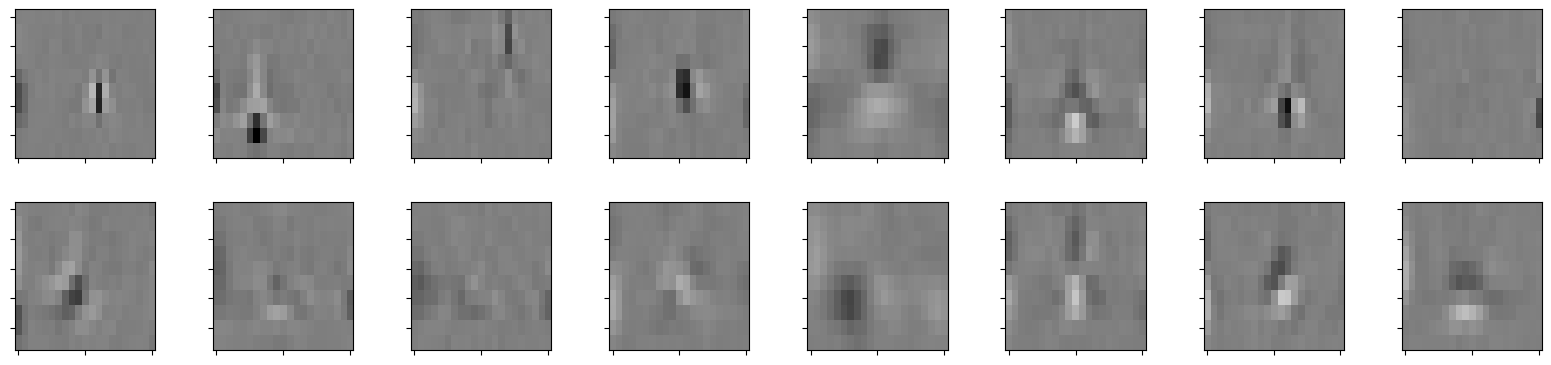

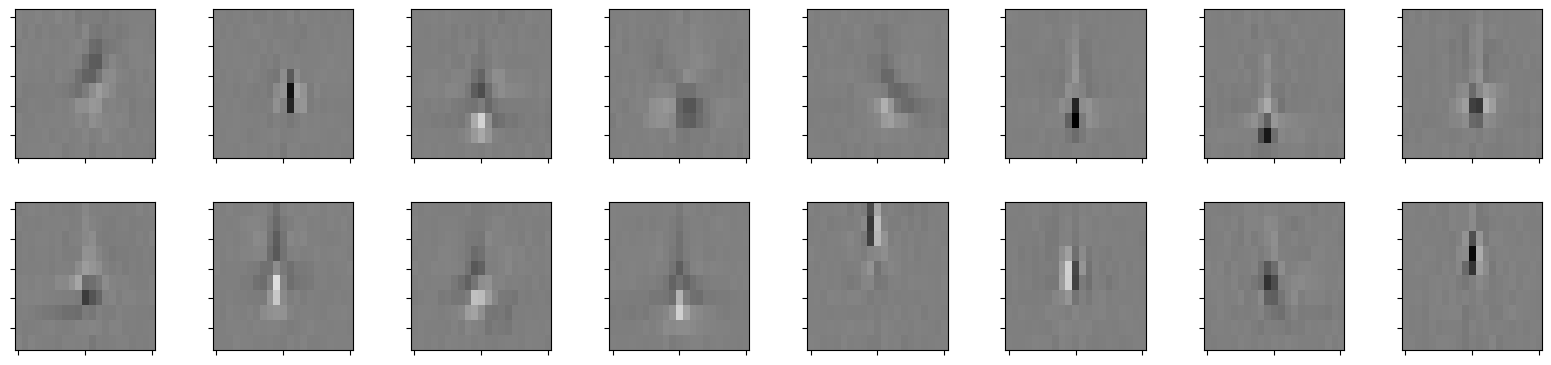

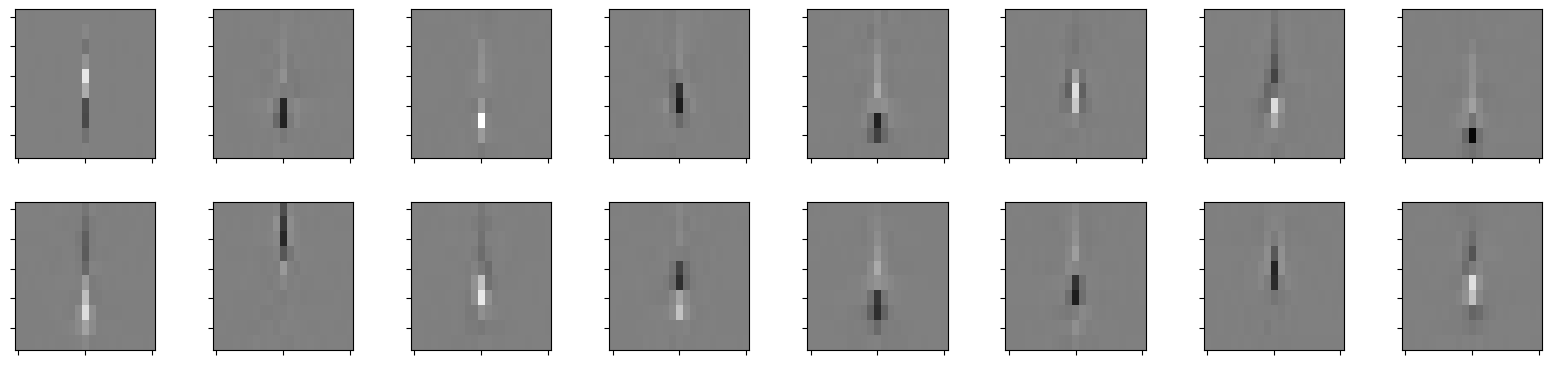

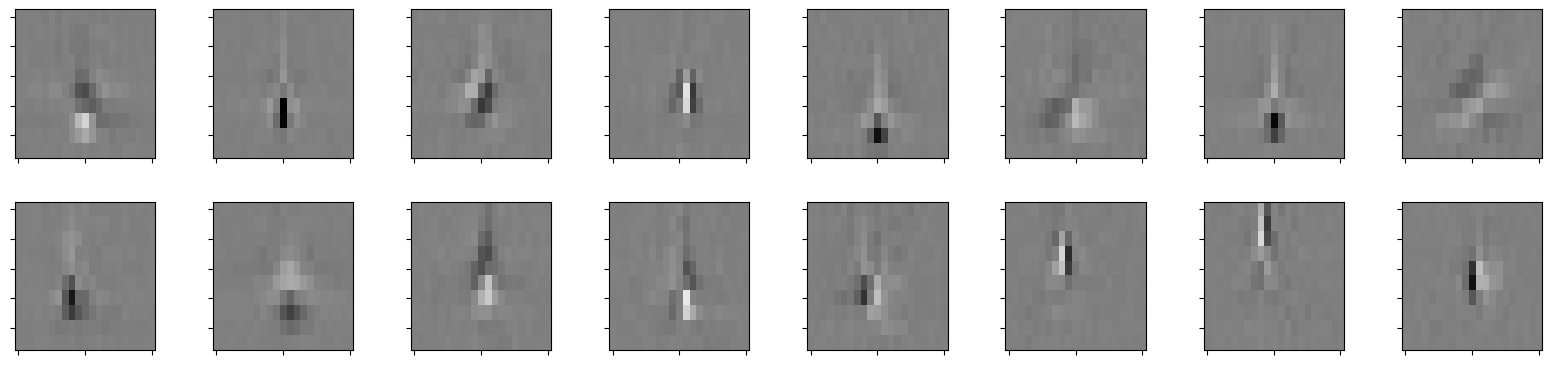

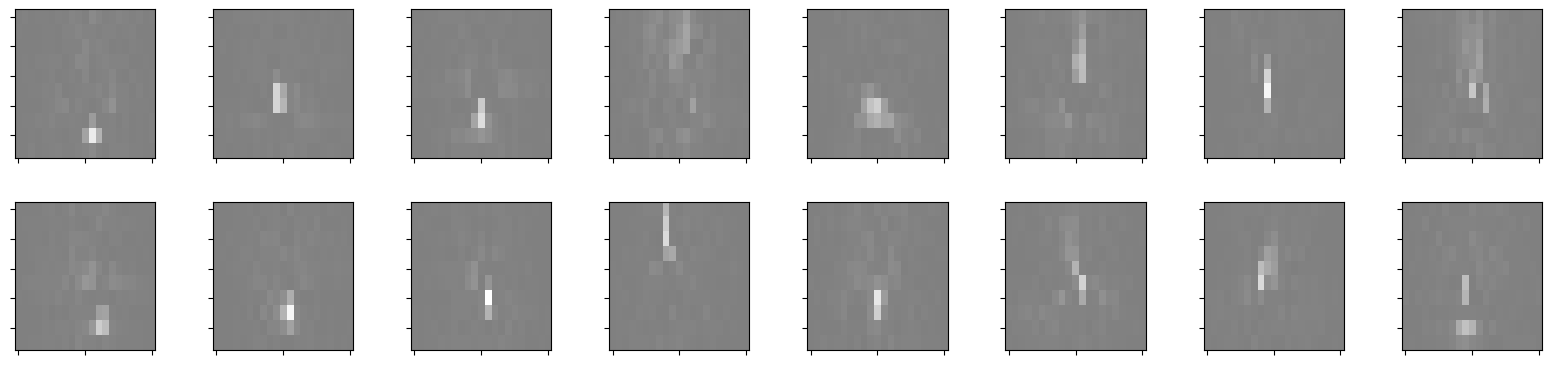

In [5]:
# plot the weights of the models in the different trials
model0.NDN.plot_filters()
model1.NDN.plot_filters()
model2.NDN.plot_filters()
model3.NDN.plot_filters()
model4.NDN.plot_filters()

# trying the new activity regularization

In [6]:
e = exp.load('reg_experiment_02', experiment_location='experiments', datadir='Mdata')
e.trials

,null_adjusted_LL,num_filters,num_inh_percent,expt,kernel_widths,kernel_heights,copy_weights,freeze_weights,include_MUs,is_multiexp,batch_size,modelstr,l1,activity,name,trial,mean_LLs
0,True,"16,8,8",0.5,expt01+expt02+expt03+expt04+expt05+expt06+expt...,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,0.0001,0.0,cnim_scaffold0,<experiment.Trial object at 0x7f82dd4ed250>,0.197844
0,True,"16,8,8",0.5,expt01+expt02+expt03+expt04+expt05+expt06+expt...,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,0.0001,0.1,cnim_scaffold1,<experiment.Trial object at 0x7f82dcec21f0>,-0.000802
0,True,"16,8,8",0.5,expt01+expt02+expt03+expt04+expt05+expt06+expt...,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,0.0001,0.5,cnim_scaffold2,<experiment.Trial object at 0x7f82dcfc7c70>,-0.000564


lazy loading losses
lazy loading losses
lazy loading losses


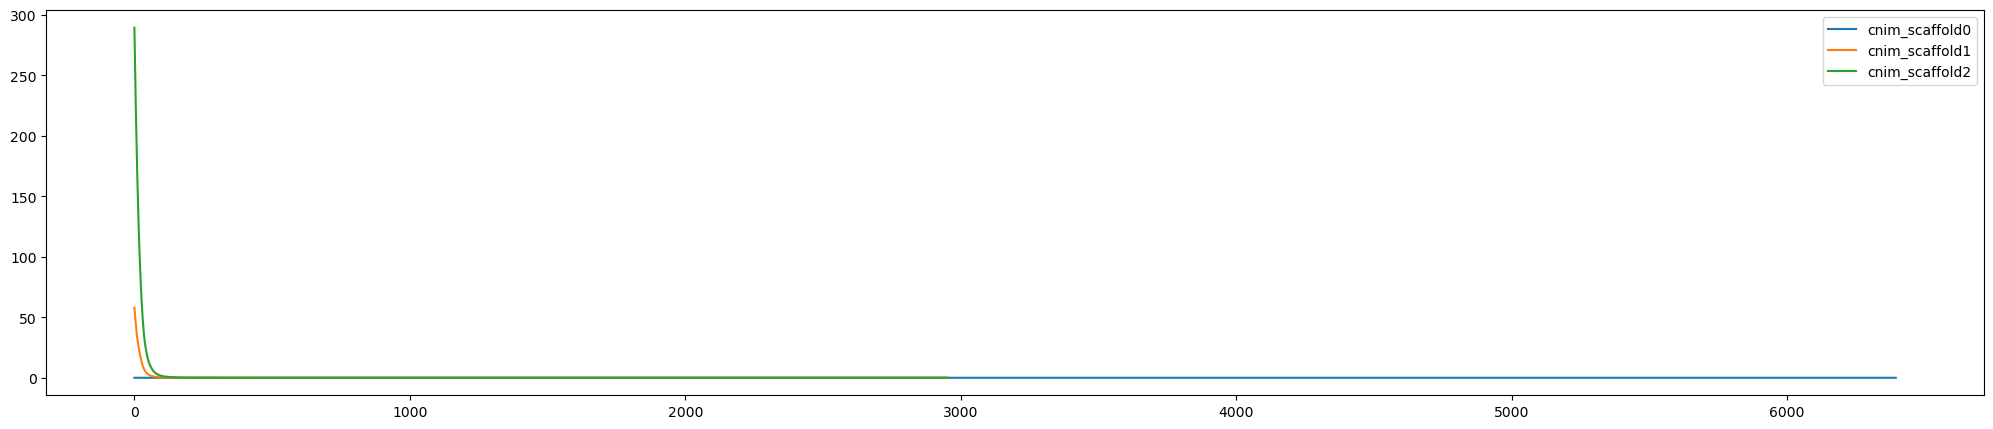

In [7]:
import experiment
e.plot_losses(trials=e.trials_where(null_adjusted_LL=True), loss_type=experiment.Loss.reg, figsize=(25,5))

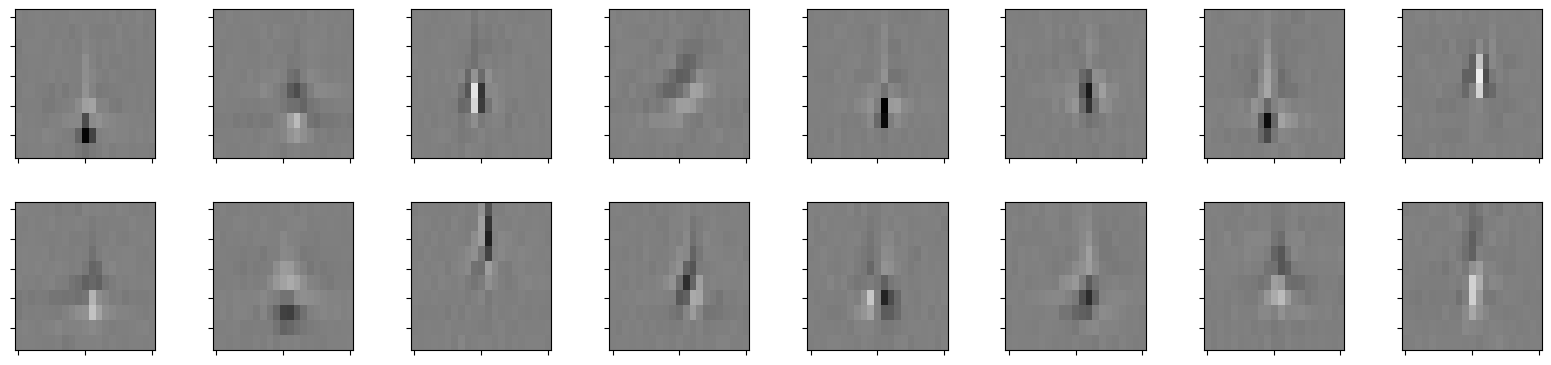

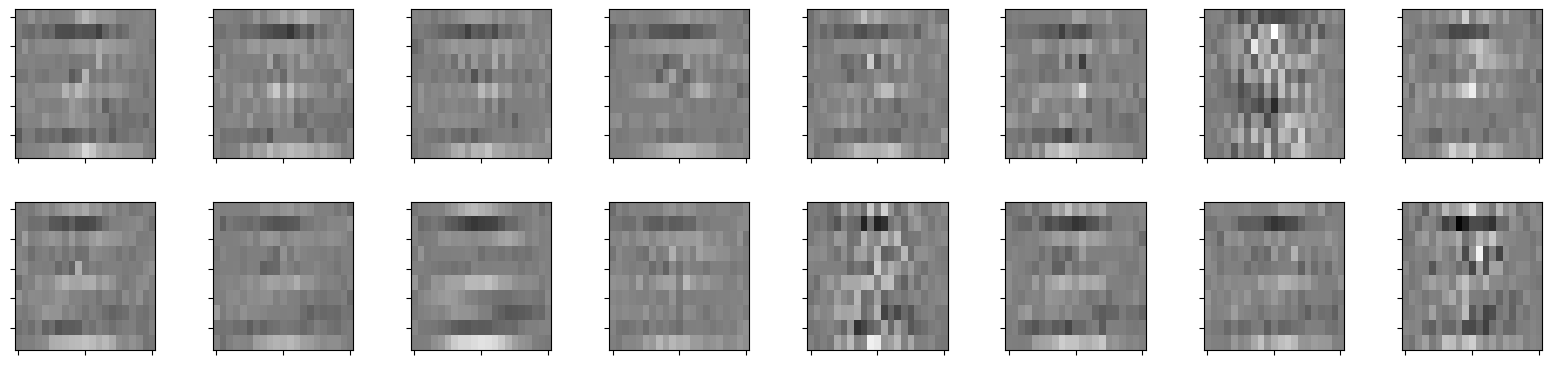

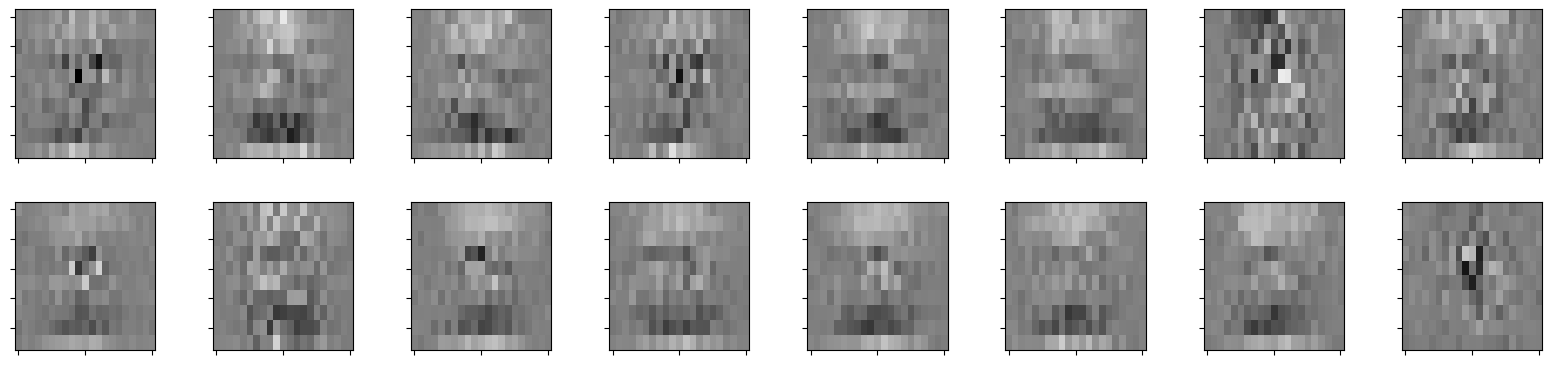

In [8]:
trial0 = e.trials_where(name='cnim_scaffold0')[0]
trial0.model.NDN.plot_filters()
trial1 = e.trials_where(name='cnim_scaffold1')[0]
trial1.model.NDN.plot_filters()
trial2 = e.trials_where(name='cnim_scaffold2')[0]
trial2.model.NDN.plot_filters()

In [9]:
import predict
results0 = predict.predict(trial0.model, dataset=trial0.dataset)
results1 = predict.predict(trial1.model, dataset=trial1.dataset)
results2 = predict.predict(trial2.model, dataset=trial2.dataset)

lazy loading dataset
Loading ['expt01', 'expt02', 'expt03', 'expt04', 'expt05', 'expt06', 'expt07', 'expt08', 'expt09', 'expt10', 'expt11', 'expt12']
Loading expt01
  Time embedding...
  Done.
Loading expt02
  Time embedding...
  Done.
Loading expt03
  Time embedding...
  Done.
Loading expt04
  Time embedding...
  Done.
Loading expt05
  Time embedding...
  Done.
Loading expt06
  Time embedding...
  Done.
Loading expt07
  Time embedding...
  Done.
Loading expt08
  Time embedding...
  Done.
Loading expt09
  Time embedding...
  Done.
Loading expt10
  Time embedding...
  Done.
Loading expt11
  Time embedding...
  Done.
Loading expt12
  Time embedding...
  Done.


TypeError: new(): invalid data type 'str'

# trying different orders of magnitude for the activity regularization

In [63]:
e4 = exp.load('reg_experiment_04', experiment_location='experiments', datadir='Mdata')
e4.trials

Error loading trial cnim_scaffold4 ...skipping
[Errno 2] No such file or directory: 'experiments/reg_experiment_04/cnim_scaffold4/model.pickle'


,null_adjusted_LL,num_filters,num_inh_percent,expt,kernel_widths,kernel_heights,copy_weights,freeze_weights,include_MUs,is_multiexp,batch_size,modelstr,activity,name,trial,mean_LLs
0,True,"16,8,8",0.5,expt01+expt02+expt03+expt04+expt05+expt06+expt...,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,1.000,cnim_scaffold0,<experiment.Trial object at 0x7f821fb3cf40>,0.019008
0,True,"16,8,8",0.5,expt01+expt02+expt03+expt04+expt05+expt06+expt...,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,0.100,cnim_scaffold1,<experiment.Trial object at 0x7f821f75b0a0>,0.097609
0,True,"16,8,8",0.5,expt01+expt02+expt03+expt04+expt05+expt06+expt...,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,0.010,cnim_scaffold2,<experiment.Trial object at 0x7f821faae0d0>,0.146895
0,True,"16,8,8",0.5,expt01+expt02+expt03+expt04+expt05+expt06+expt...,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,0.001,cnim_scaffold3,<experiment.Trial object at 0x7f821f2be8e0>,0.186821


activity regularization = 1.0


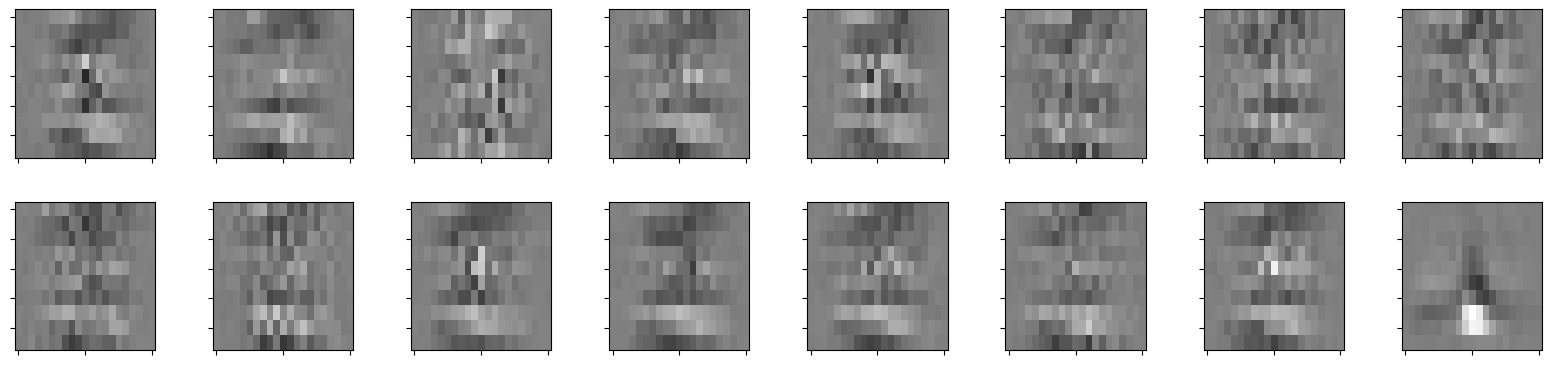

activity regularization = 0.1


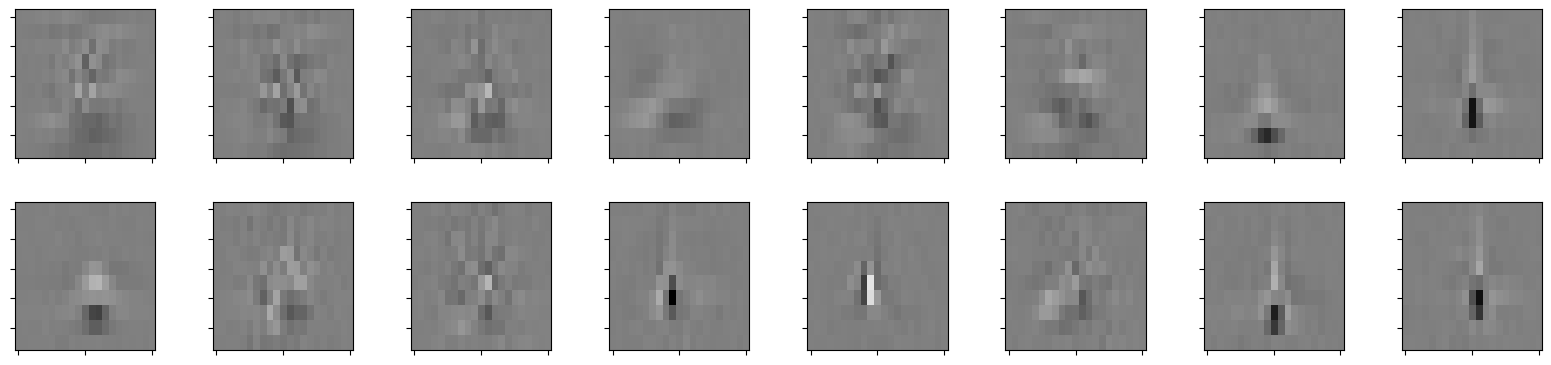

activity regularization = 0.01


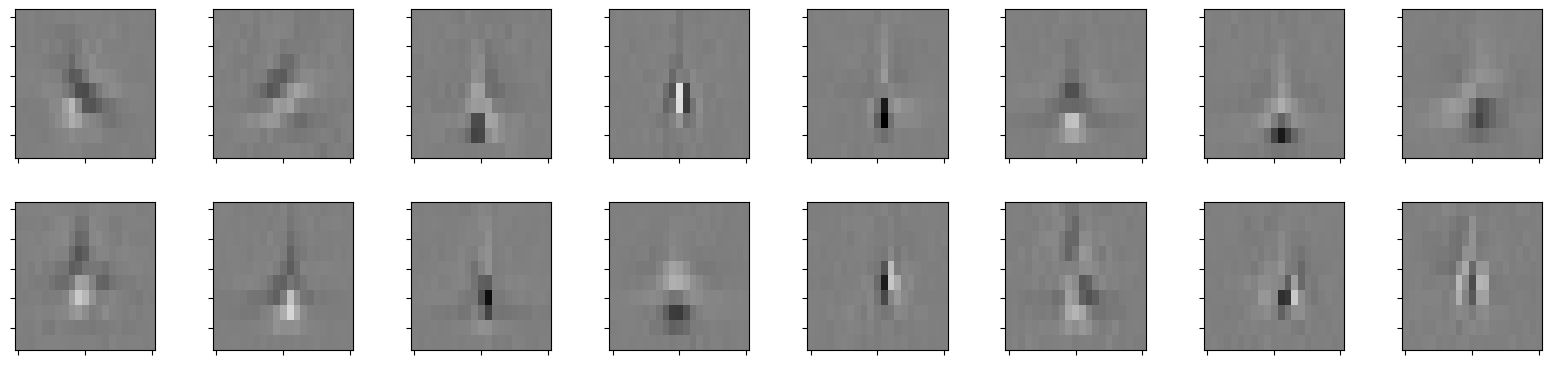

activity regularization = 0.001


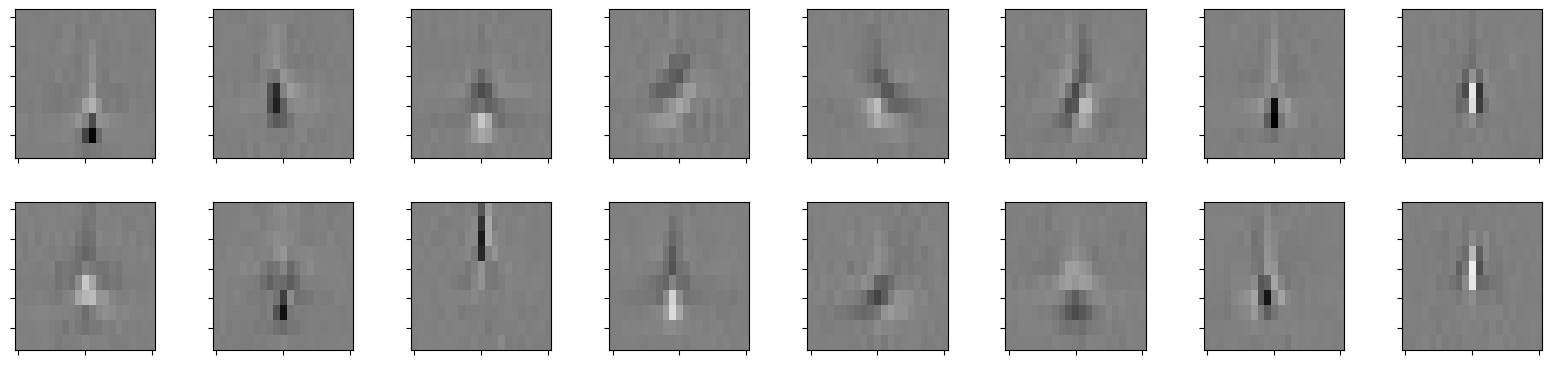

In [64]:
# plot the weights
trial0 = e4.trials_where(name='cnim_scaffold0')[0]
print('activity regularization = 1.0')
trial0.model.NDN.plot_filters()
trial1 = e4.trials_where(name='cnim_scaffold1')[0]
print('activity regularization = 0.1')
trial1.model.NDN.plot_filters()
trial2 = e4.trials_where(name='cnim_scaffold2')[0]
print('activity regularization = 0.01')
trial2.model.NDN.plot_filters()
trial3 = e4.trials_where(name='cnim_scaffold3')[0]
print('activity regularization = 0.001')
trial3.model.NDN.plot_filters()

# plot the Jacobians for a particular stimulus

In [99]:
max_frame = 100
results0 = predict.predict(trial0.model, dataset=trial0.dataset[0:max_frame], network_names_to_use=['core'])
results1 = predict.predict(trial1.model, dataset=trial1.dataset[0:max_frame], network_names_to_use=['core'])

prev_output shape torch.Size([100, 360]) ni 0 NetworkType.scaffold li 0
prev_output shape torch.Size([100, 576]) ni 0 NetworkType.scaffold li 1
prev_output shape torch.Size([100, 288]) ni 0 NetworkType.scaffold li 2
prev_output shape torch.Size([100, 360]) ni 0 NetworkType.scaffold li 0
prev_output shape torch.Size([100, 576]) ni 0 NetworkType.scaffold li 1
prev_output shape torch.Size([100, 288]) ni 0 NetworkType.scaffold li 2


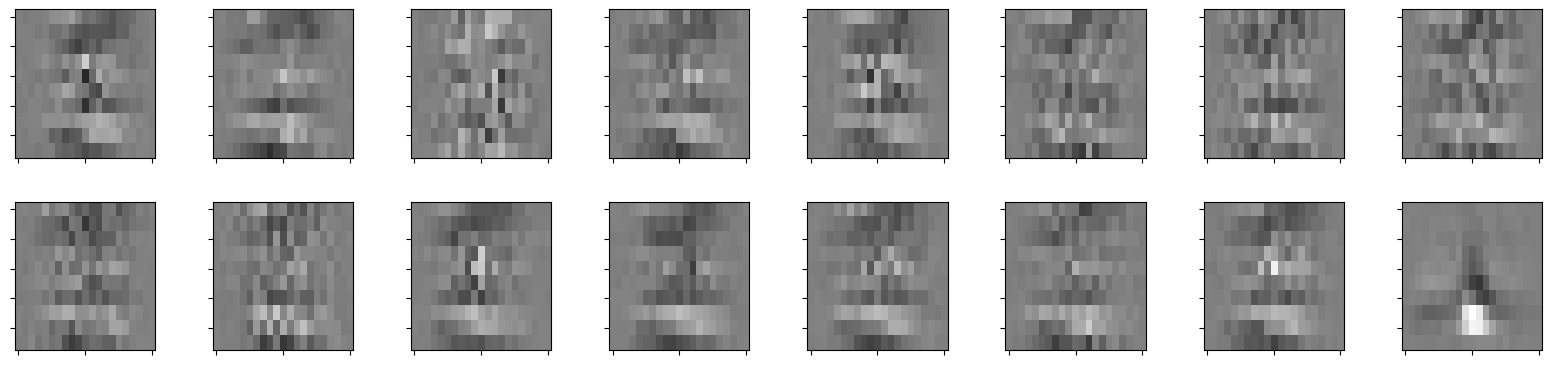

In [100]:
trial0.model.NDN.plot_filters()

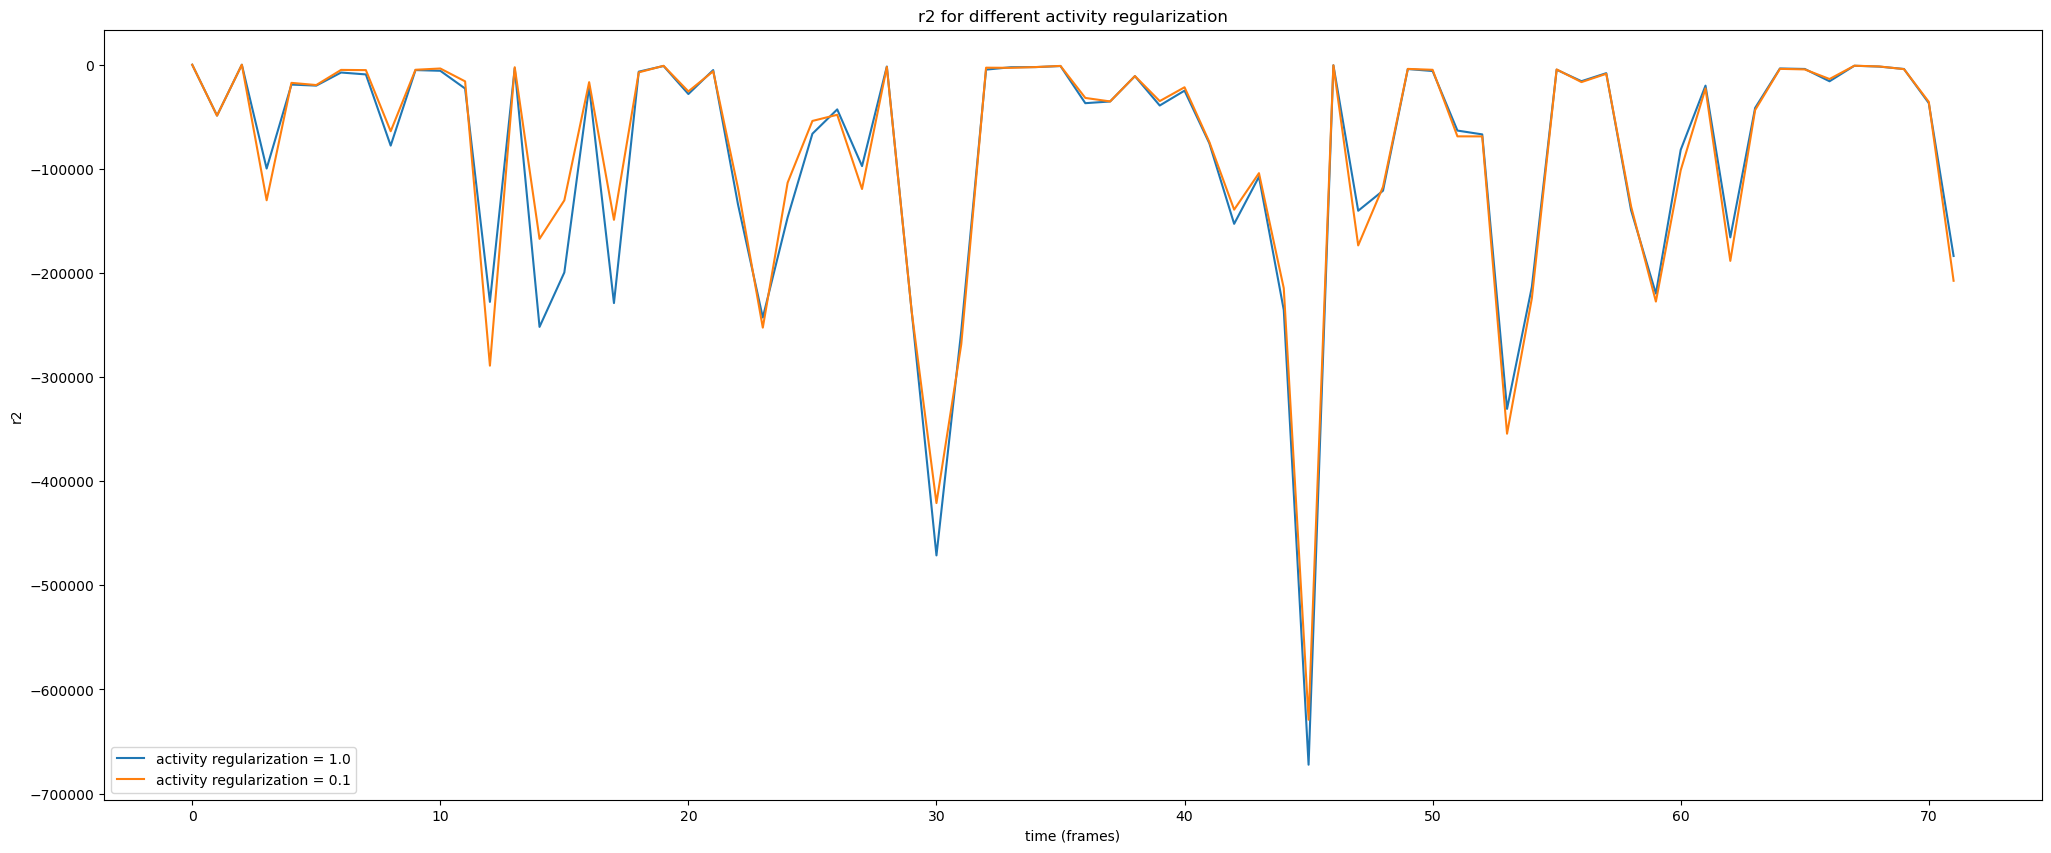

In [105]:
# plot r2 for the results
fig = plt.figure(figsize=(25,10))
plt.plot(results0.r2, label='activity regularization = 1.0')
plt.plot(results1.r2, label='activity regularization = 0.1')
plt.legend()
plt.xlabel('time (frames)')
plt.ylabel('r2')
plt.title('r2 for different activity regularization')
plt.show()

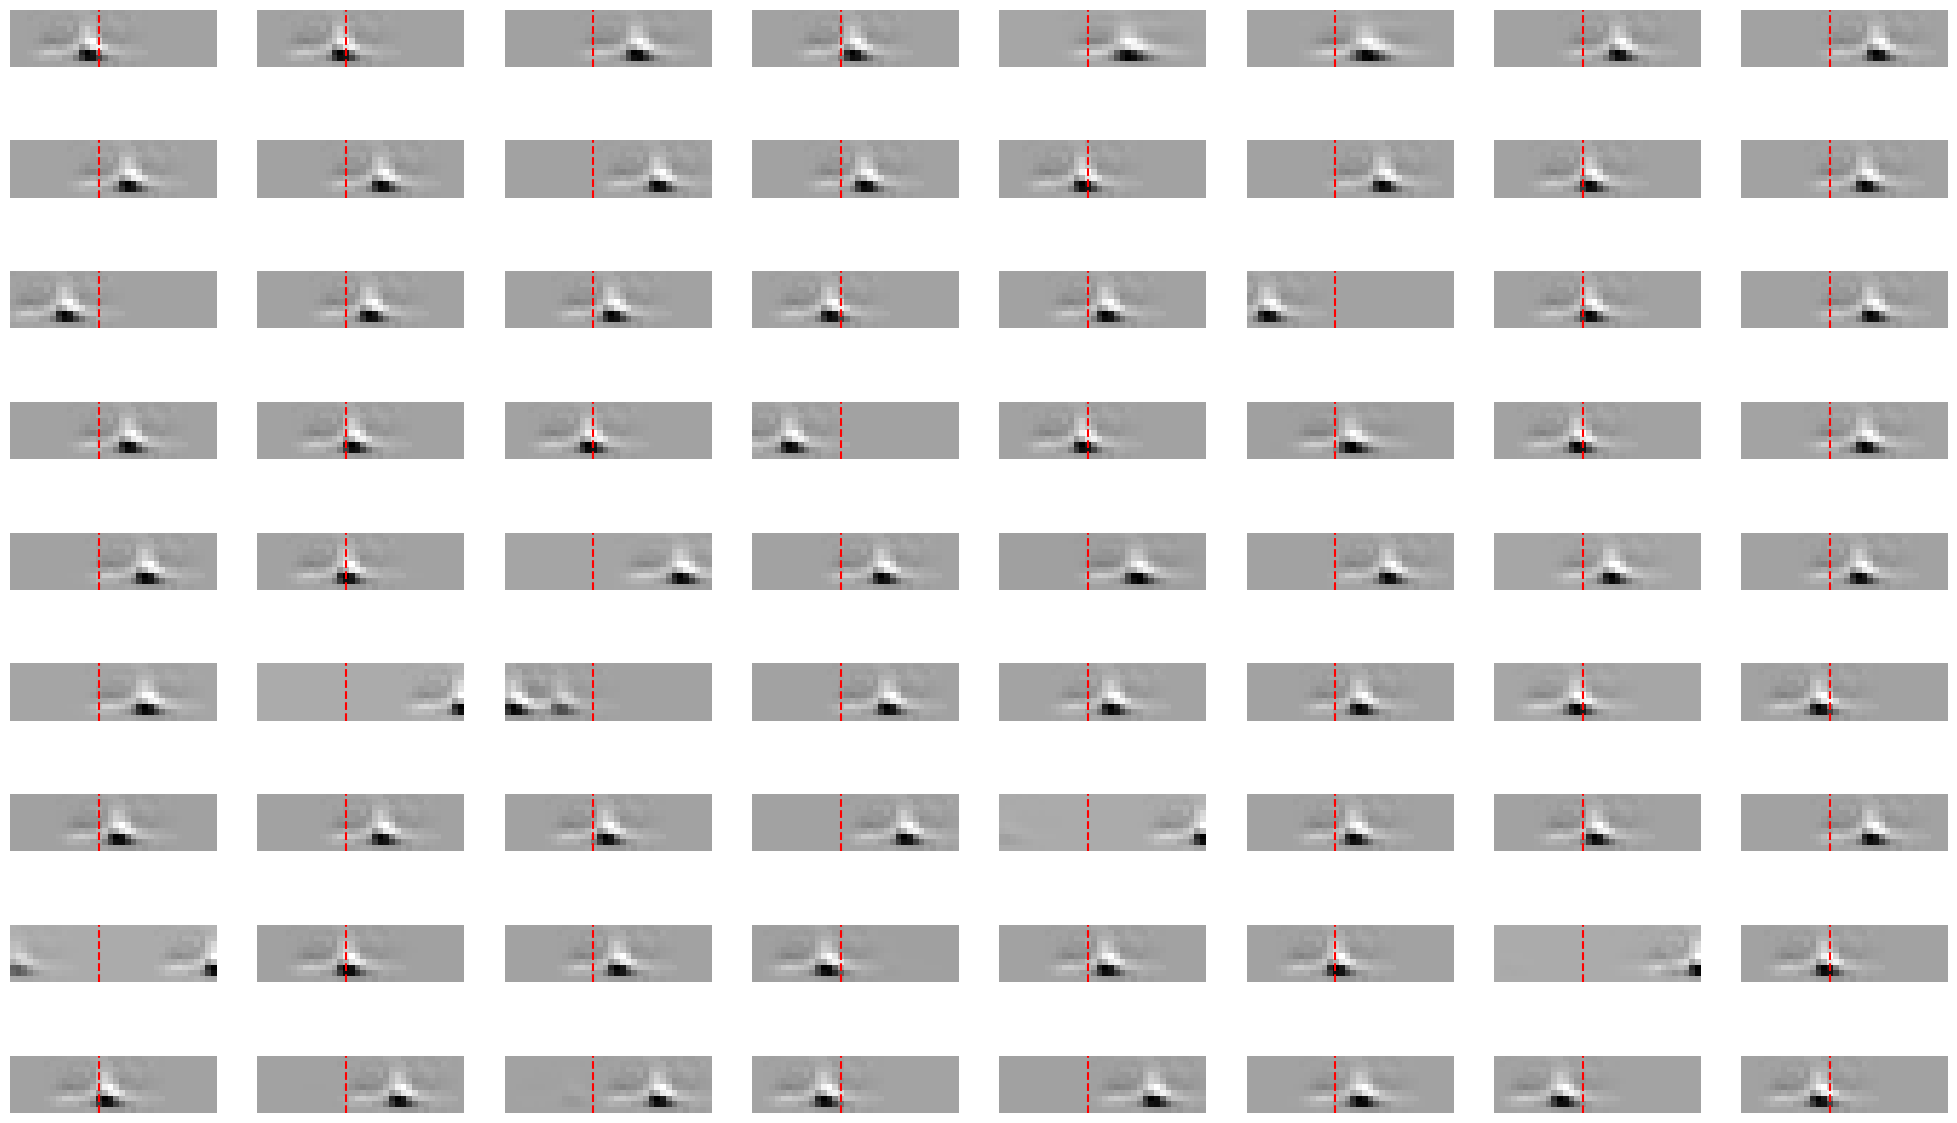

In [107]:
# plot the Jacobians for a particular stimulus
#imax = np.max(np.abs(results0.jacobian[0,1,:]))
#imin = -imax
# plot stimulus and Jacobian side by side for each timepoint using a Grid
fig = plt.figure(figsize=(25,15))
grid = plt.GridSpec(9, 8)
for i in range(trial0.dataset.NC):
    row, col = np.unravel_index(i, (9, 8))
    ax1 = fig.add_subplot(grid[row,col])
    ax1.axis('off')
    rf = np.mean([results0.jacobian[f][0, i, :].detach().cpu().numpy() for f in range(max_frame)], axis=0)
    ax1.imshow(rf.reshape(36,10).T, cmap='gray', origin='lower') # set origin to lower to flip image vertically
    ax1.axvline(x=15, color='r', linestyle='--')

(21, 10, 16) --> (16, 10, 21)
(16, 11, 8) --> (8, 11, 16)
(8, 5, 8) --> (8, 5, 8)
(32, 36, 72) --> (72, 36, 32)


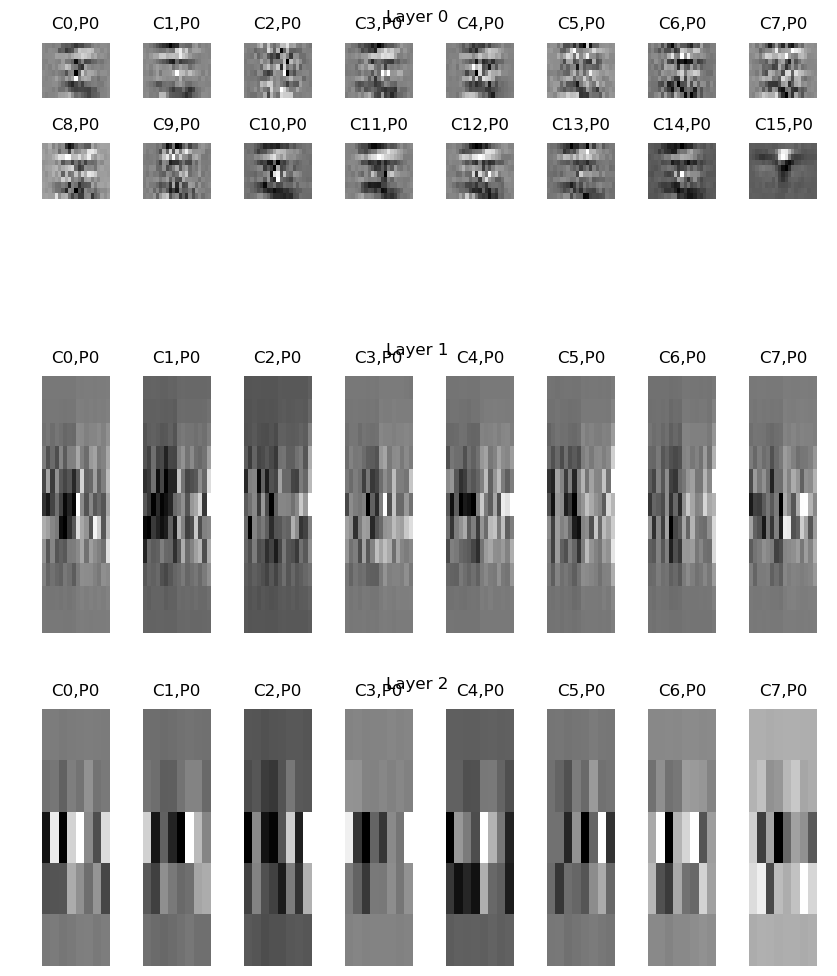

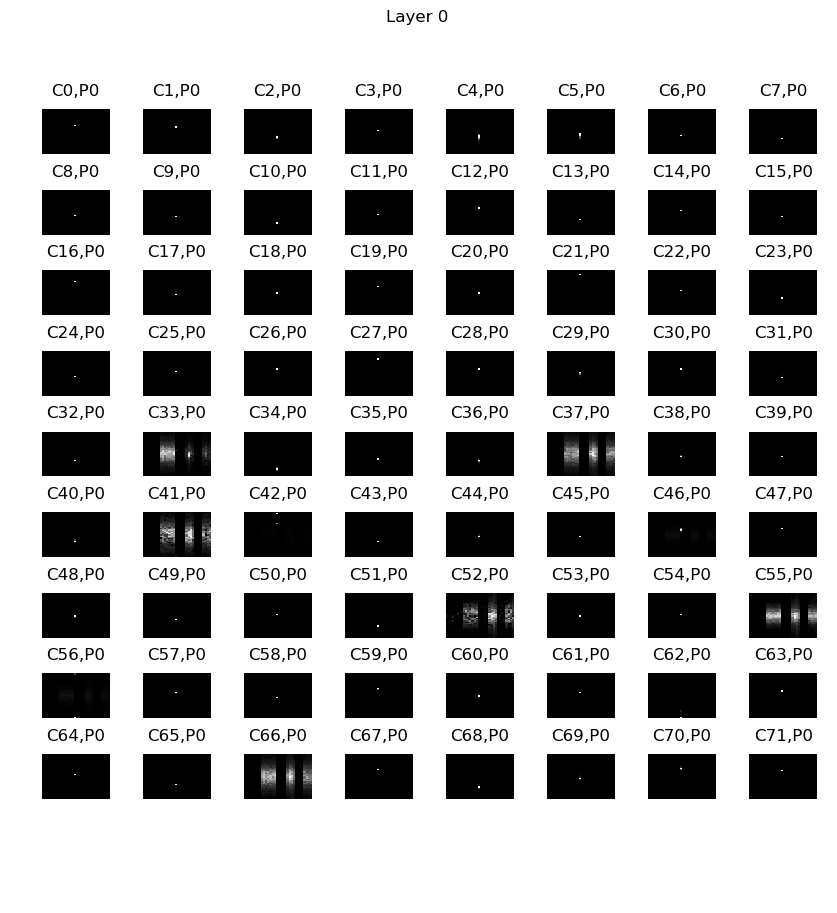

In [122]:
import plot
plot.plot_model_weights(trial0.model)

(21, 10, 16) --> (16, 10, 21)
(16, 11, 8) --> (8, 11, 16)
(8, 5, 8) --> (8, 5, 8)
(32, 36, 72) --> (72, 36, 32)


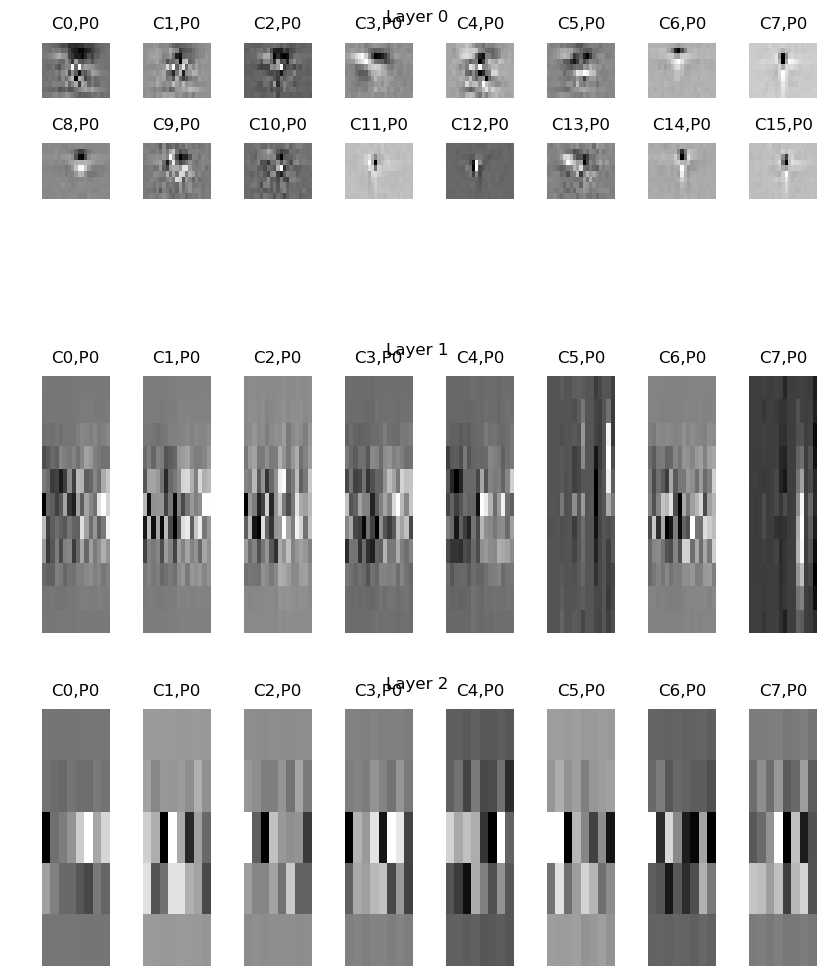

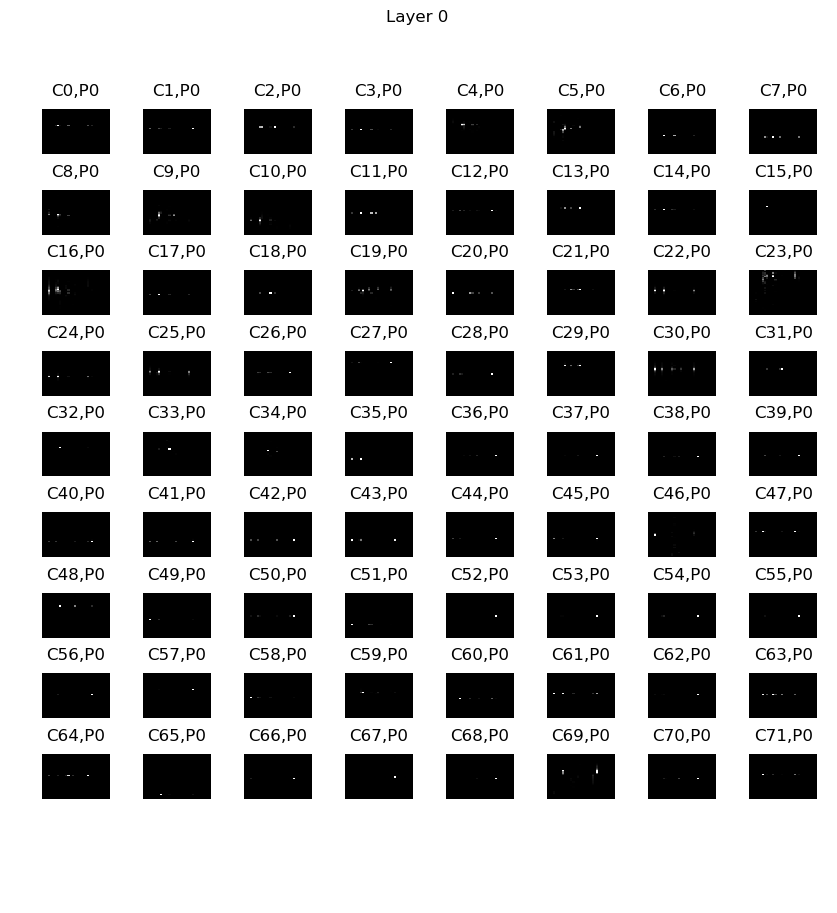

In [123]:
plot.plot_model_weights(trial1.model)

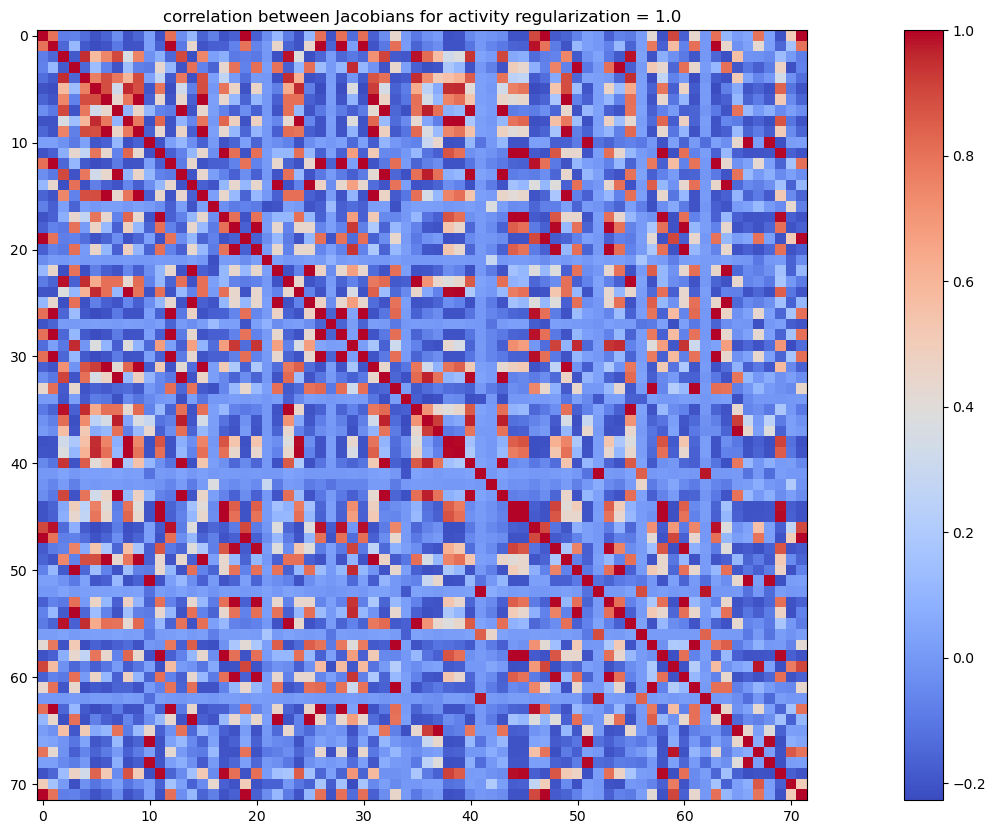

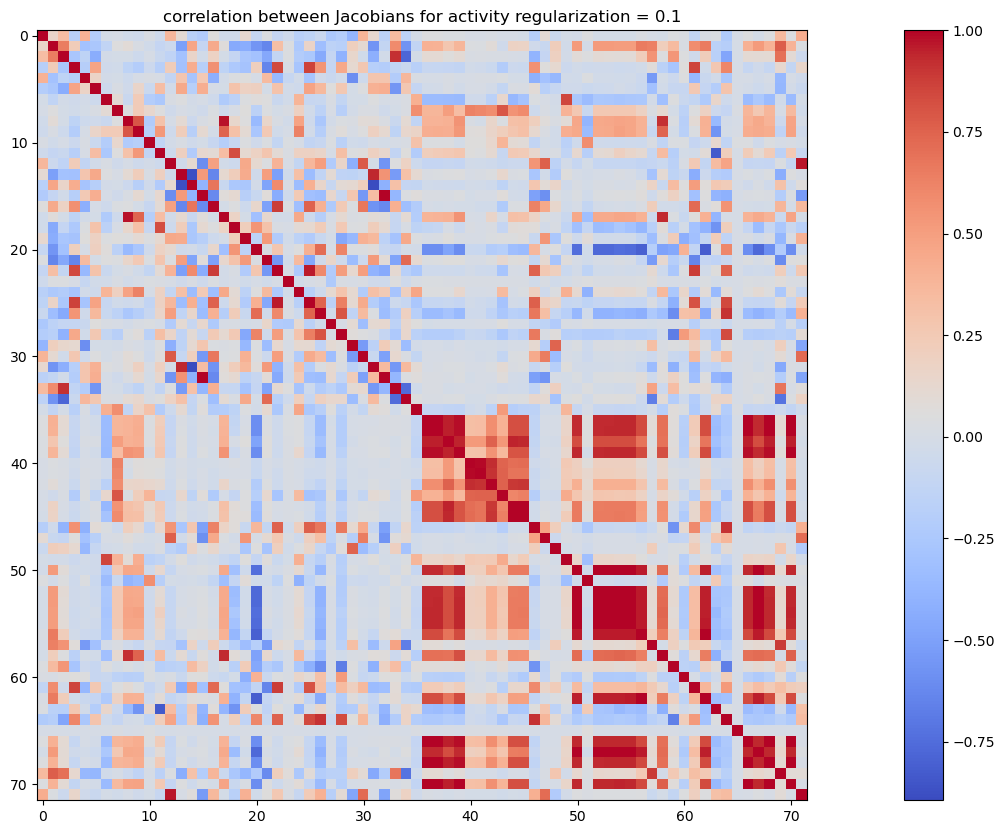

In [114]:
# plot correlation between Jacobians for different activity regularization values
fig = plt.figure(figsize=(25,10))
activation_correlation0 = np.corrcoef(results0.jacobian[0][0, :, :].detach().cpu().numpy(), rowvar=True)
plt.imshow(activation_correlation0, cmap='coolwarm')
plt.colorbar()
plt.title('correlation between Jacobians for activity regularization = 1.0')
plt.show()

# plot correlation between Jacobians for different activity regularization values
fig = plt.figure(figsize=(25,10))
activation_correlation1 = np.corrcoef(results1.jacobian[0][0, :, :].detach().cpu().numpy(), rowvar=True)
plt.imshow(activation_correlation1, cmap='coolwarm')
plt.colorbar()
plt.title('correlation between Jacobians for activity regularization = 0.1')
plt.show()

(21, 10, 16) --> (16, 10, 21)
(16, 11, 8) --> (8, 11, 16)
(8, 5, 8) --> (8, 5, 8)
(32, 36, 72) --> (72, 36, 32)


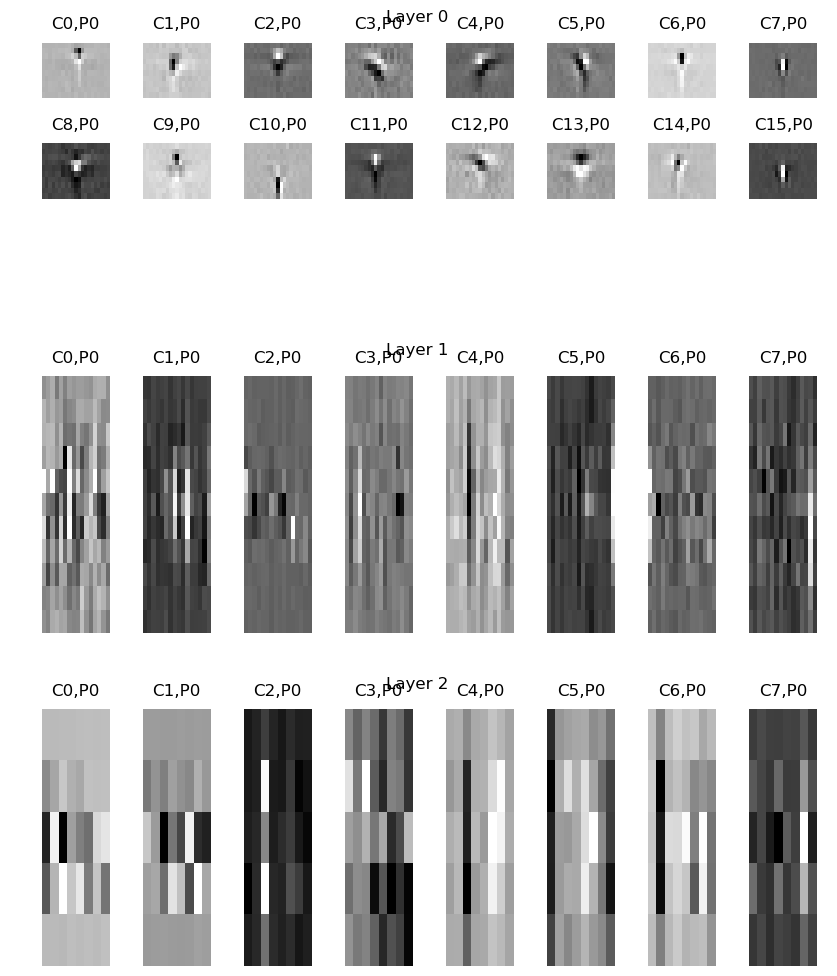

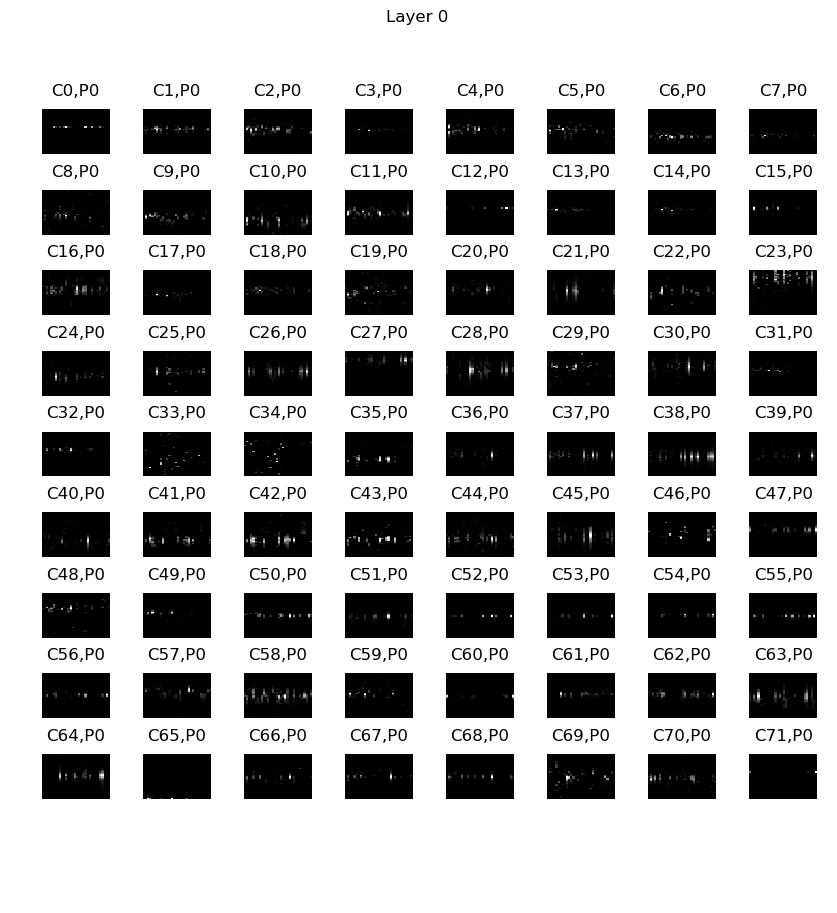

In [129]:
# get the weights going to each neuron
plot.plot_model_weights(trial3.model)

# get the weights for a single neuron

In [163]:
trial3.model.networks_by_name['readout'].layers[0].weights.shape

(32, 36, 72)

(72, 1152) 0.0 56.2555
(72, 1152) 0.0 31.882818
(72, 1152) 0.0 10.023052
(72, 1152) 0.0 4.328096


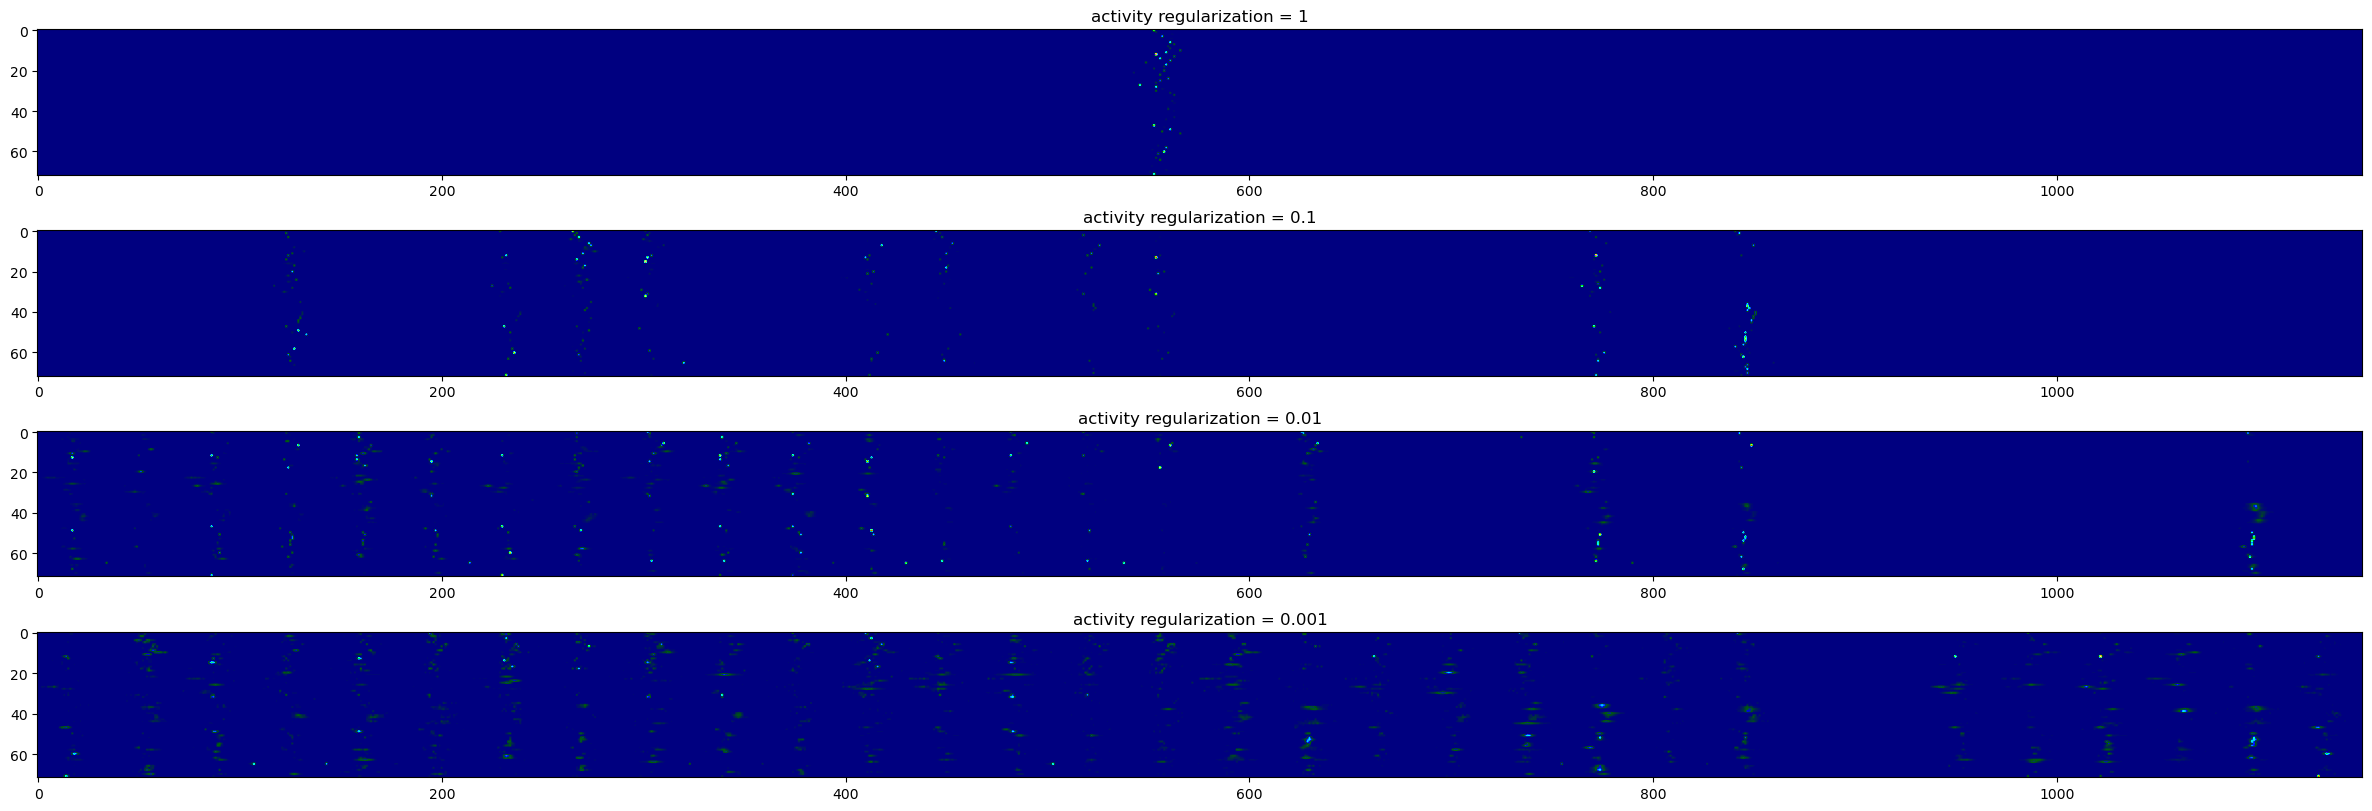

In [164]:
# (concatenate the weights from all the layers)
# plot the weights for each trial
fig = plt.figure(figsize=(30,10))
for i in range(4):
    trial = e4.trials_where(name='cnim_scaffold'+str(i))[0]
    ax = fig.add_subplot(4,1,i+1)
    im = trial.model.networks_by_name['readout'].layers[0].weights.reshape(1152,72).T
    imin = np.min(im)
    imax = np.max(im)
    print(im.shape, imin, imax)
    ax.imshow(im, cmap='gist_ncar', vmin=imin, vmax=imax)
    ax.set_title('activity regularization = '+str(10**(-i)))

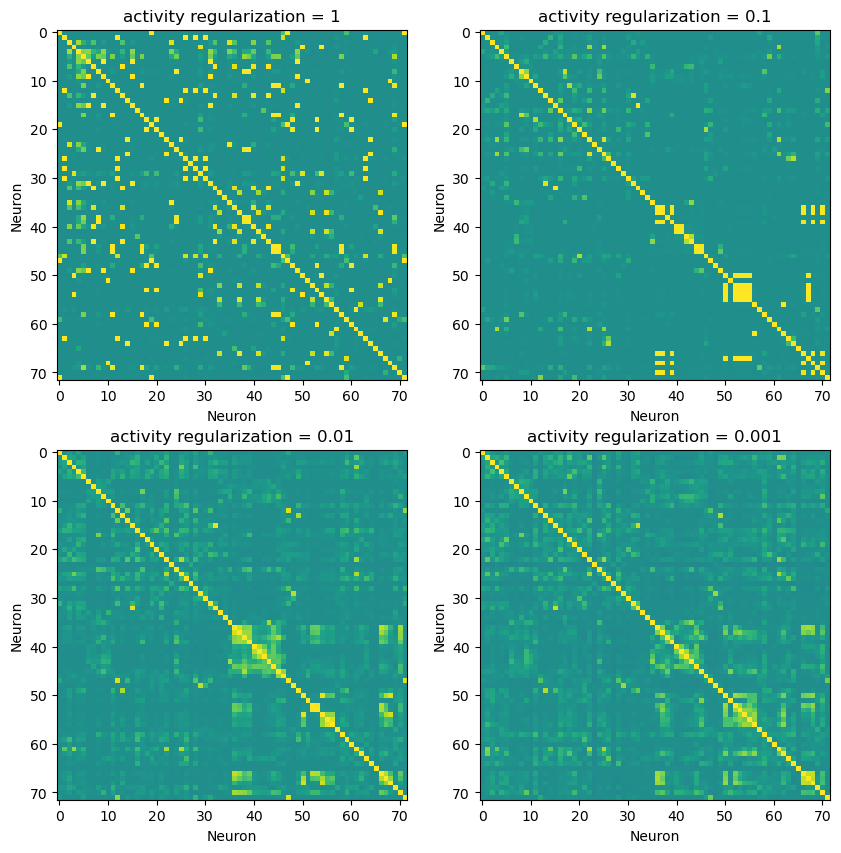

In [182]:
# calculate the correlation between neurons for each trial
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a list of matrices called 'matrices_list'
matrices_list = [np.random.rand(72, 1152) for _ in range(5)]

# Function to compute the correlation matrix
def get_correlation_matrix(matrix):
    return np.corrcoef(np.transpose(matrix))

# Iterate through the list of matrices, compute the correlation matrices, and plot them as images
fig = plt.figure(figsize=(10,10))
grid = plt.GridSpec(2,2)
for i in range(4):
    row, col = np.unravel_index(i, (2,2))
    ax = fig.add_subplot(grid[row,col])
    trial = e4.trials_where(name='cnim_scaffold'+str(i))[0]
    matrix = trial.model.networks_by_name['readout'].layers[0].weights.reshape(1152,72)
    correlation_matrix = get_correlation_matrix(matrix)
    ax.imshow(correlation_matrix, cmap='viridis', vmin=-1, vmax=1)
    plt.title(f'activity regularization = '+str(10**(-i)))
    plt.xlabel('Neuron')
    plt.ylabel('Neuron')
plt.show()

# use UMAP

In [243]:
# use UMAP to visualize the weights
import umap
weights = trial3.model.networks_by_name['readout'].layers[0].weights.reshape(1152,72).T
reducer = umap.UMAP(n_components=3)
embedding = reducer.fit_transform(weights)
print(embedding.shape)

# plot the embedding
import plotly.express as px
fig = px.scatter_3d(embedding, x=0, y=1, z=2, width=800, height=800, template='simple_white')
fig.show()

(72, 3)


# do some graph stuff

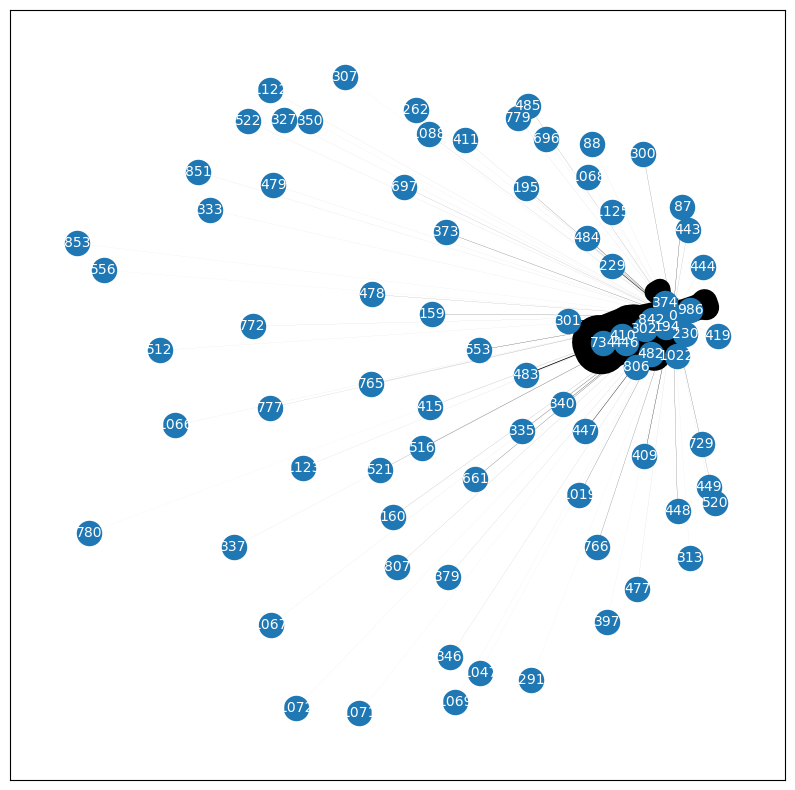

In [239]:
# get the graph for a single neuron, sparsify it, and plot it
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# get the weights for a single neuron, walk backwards from the neuron
weights = trial3.model.networks_by_name['readout'].layers[0].weights.reshape(1152,72).T
neuron = 0
graph = nx.DiGraph()
graph.add_node(neuron)
filtered_weights = []
for i in range(1152):
    if weights[neuron, i] > 0.001:
        graph.add_node(i)
        graph.add_edge(i, neuron, weight=weights[neuron, i])
        filtered_weights.append(weights[neuron, i])
filtered_weights = np.array(filtered_weights)


# plot the graph with edge weights
plt.figure(figsize=(10,10))
nx.draw_networkx(graph, with_labels=True, width=filtered_weights*10, font_color='white', font_size=10)
plt.show()

# comparing results for different activity regularization values

In [299]:
e5 = exp.load('reg_experiment_05', experiment_location='experiments', datadir='Mdata')
e5.trials

,null_adjusted_LL,num_filters,num_inh_percent,expt,kernel_widths,kernel_heights,copy_weights,freeze_weights,include_MUs,is_multiexp,batch_size,modelstr,activity,name,trial,mean_LLs,l1
0,True,"16,8,8",0.5,expt04,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,0.010000,cnim_scaffold0,<experiment.Trial object at 0x7f8189c29ca0>,0.493319,NaN
0,True,"16,8,8",0.5,expt04,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,0.001000,cnim_scaffold1,<experiment.Trial object at 0x7f812cb125b0>,0.497692,NaN
0,True,"16,8,8",0.5,expt04,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,0.000100,cnim_scaffold2,<experiment.Trial object at 0x7f8189cdb9a0>,0.500840,NaN
0,True,"16,8,8",0.5,expt04,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,0.000010,cnim_scaffold3,<experiment.Trial object at 0x7f812d8d4eb0>,0.493444,NaN
0,True,"16,8,8",0.5,expt04,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,0.000001,cnim_scaffold4,<experiment.Trial object at 0x7f817259e1c0>,0.501327,NaN
0,True,"16,8,8",0.5,expt04,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,NaN,cnim_scaffold5,<experiment.Trial object at 0x7f812d959400>,0.484976,0.010000
0,True,"16,8,8",0.5,expt04,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,NaN,cnim_scaffold6,<experiment.Trial object at 0x7f817306bf40>,0.499338,0.001000
0,True,"16,8,8",0.5,expt04,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,NaN,cnim_scaffold7,<experiment.Trial object at 0x7f817c36acd0>,0.496546,0.000100
0,True,"16,8,8",0.5,expt04,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,NaN,cnim_scaffold8,<experiment.Trial object at 0x7f8173099850>,0.494635,0.000010
0,True,"16,8,8",0.5,expt04,"21,11,5","3,3,3",False,False,False,False,6000,cnim_scaffold,NaN,cnim_scaffold9,<experiment.Trial object at 0x7f818a04ef10>,0.499648,0.000001


lazy loading losses
lazy loading losses
lazy loading losses
lazy loading losses
lazy loading losses
lazy loading losses
lazy loading losses
lazy loading losses
lazy loading losses
lazy loading losses


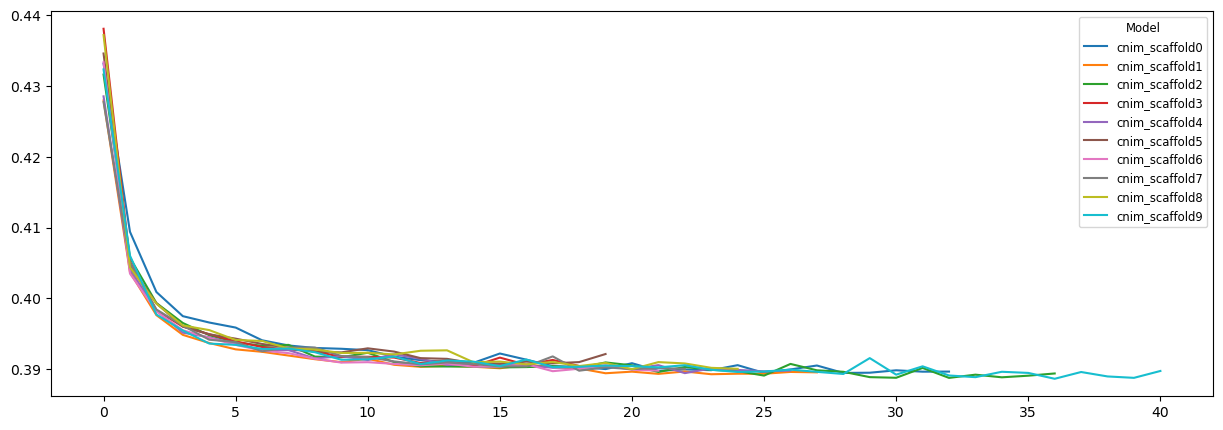

In [300]:
e5.plot_losses()

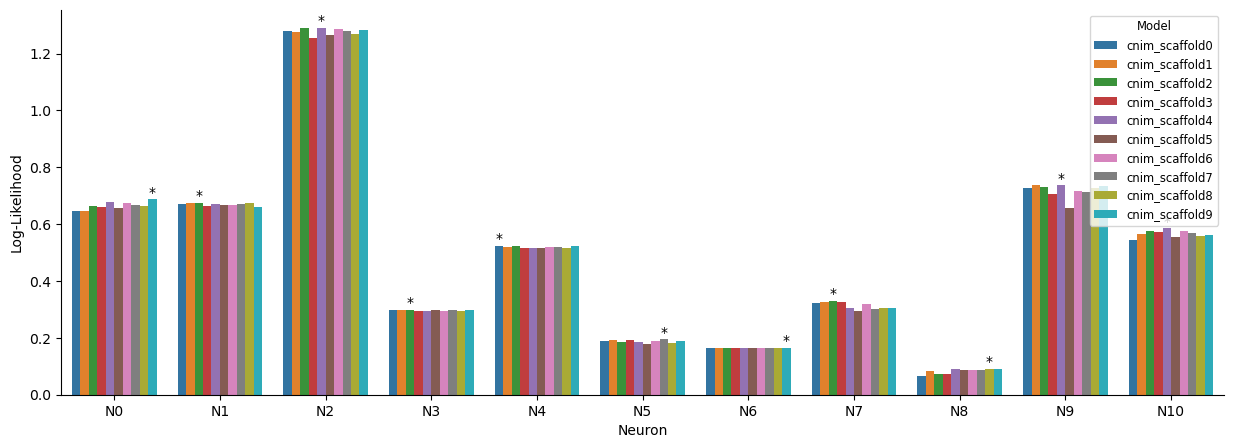

In [301]:
e5.plot_LLs()

In [303]:
len(e5.trials)

10

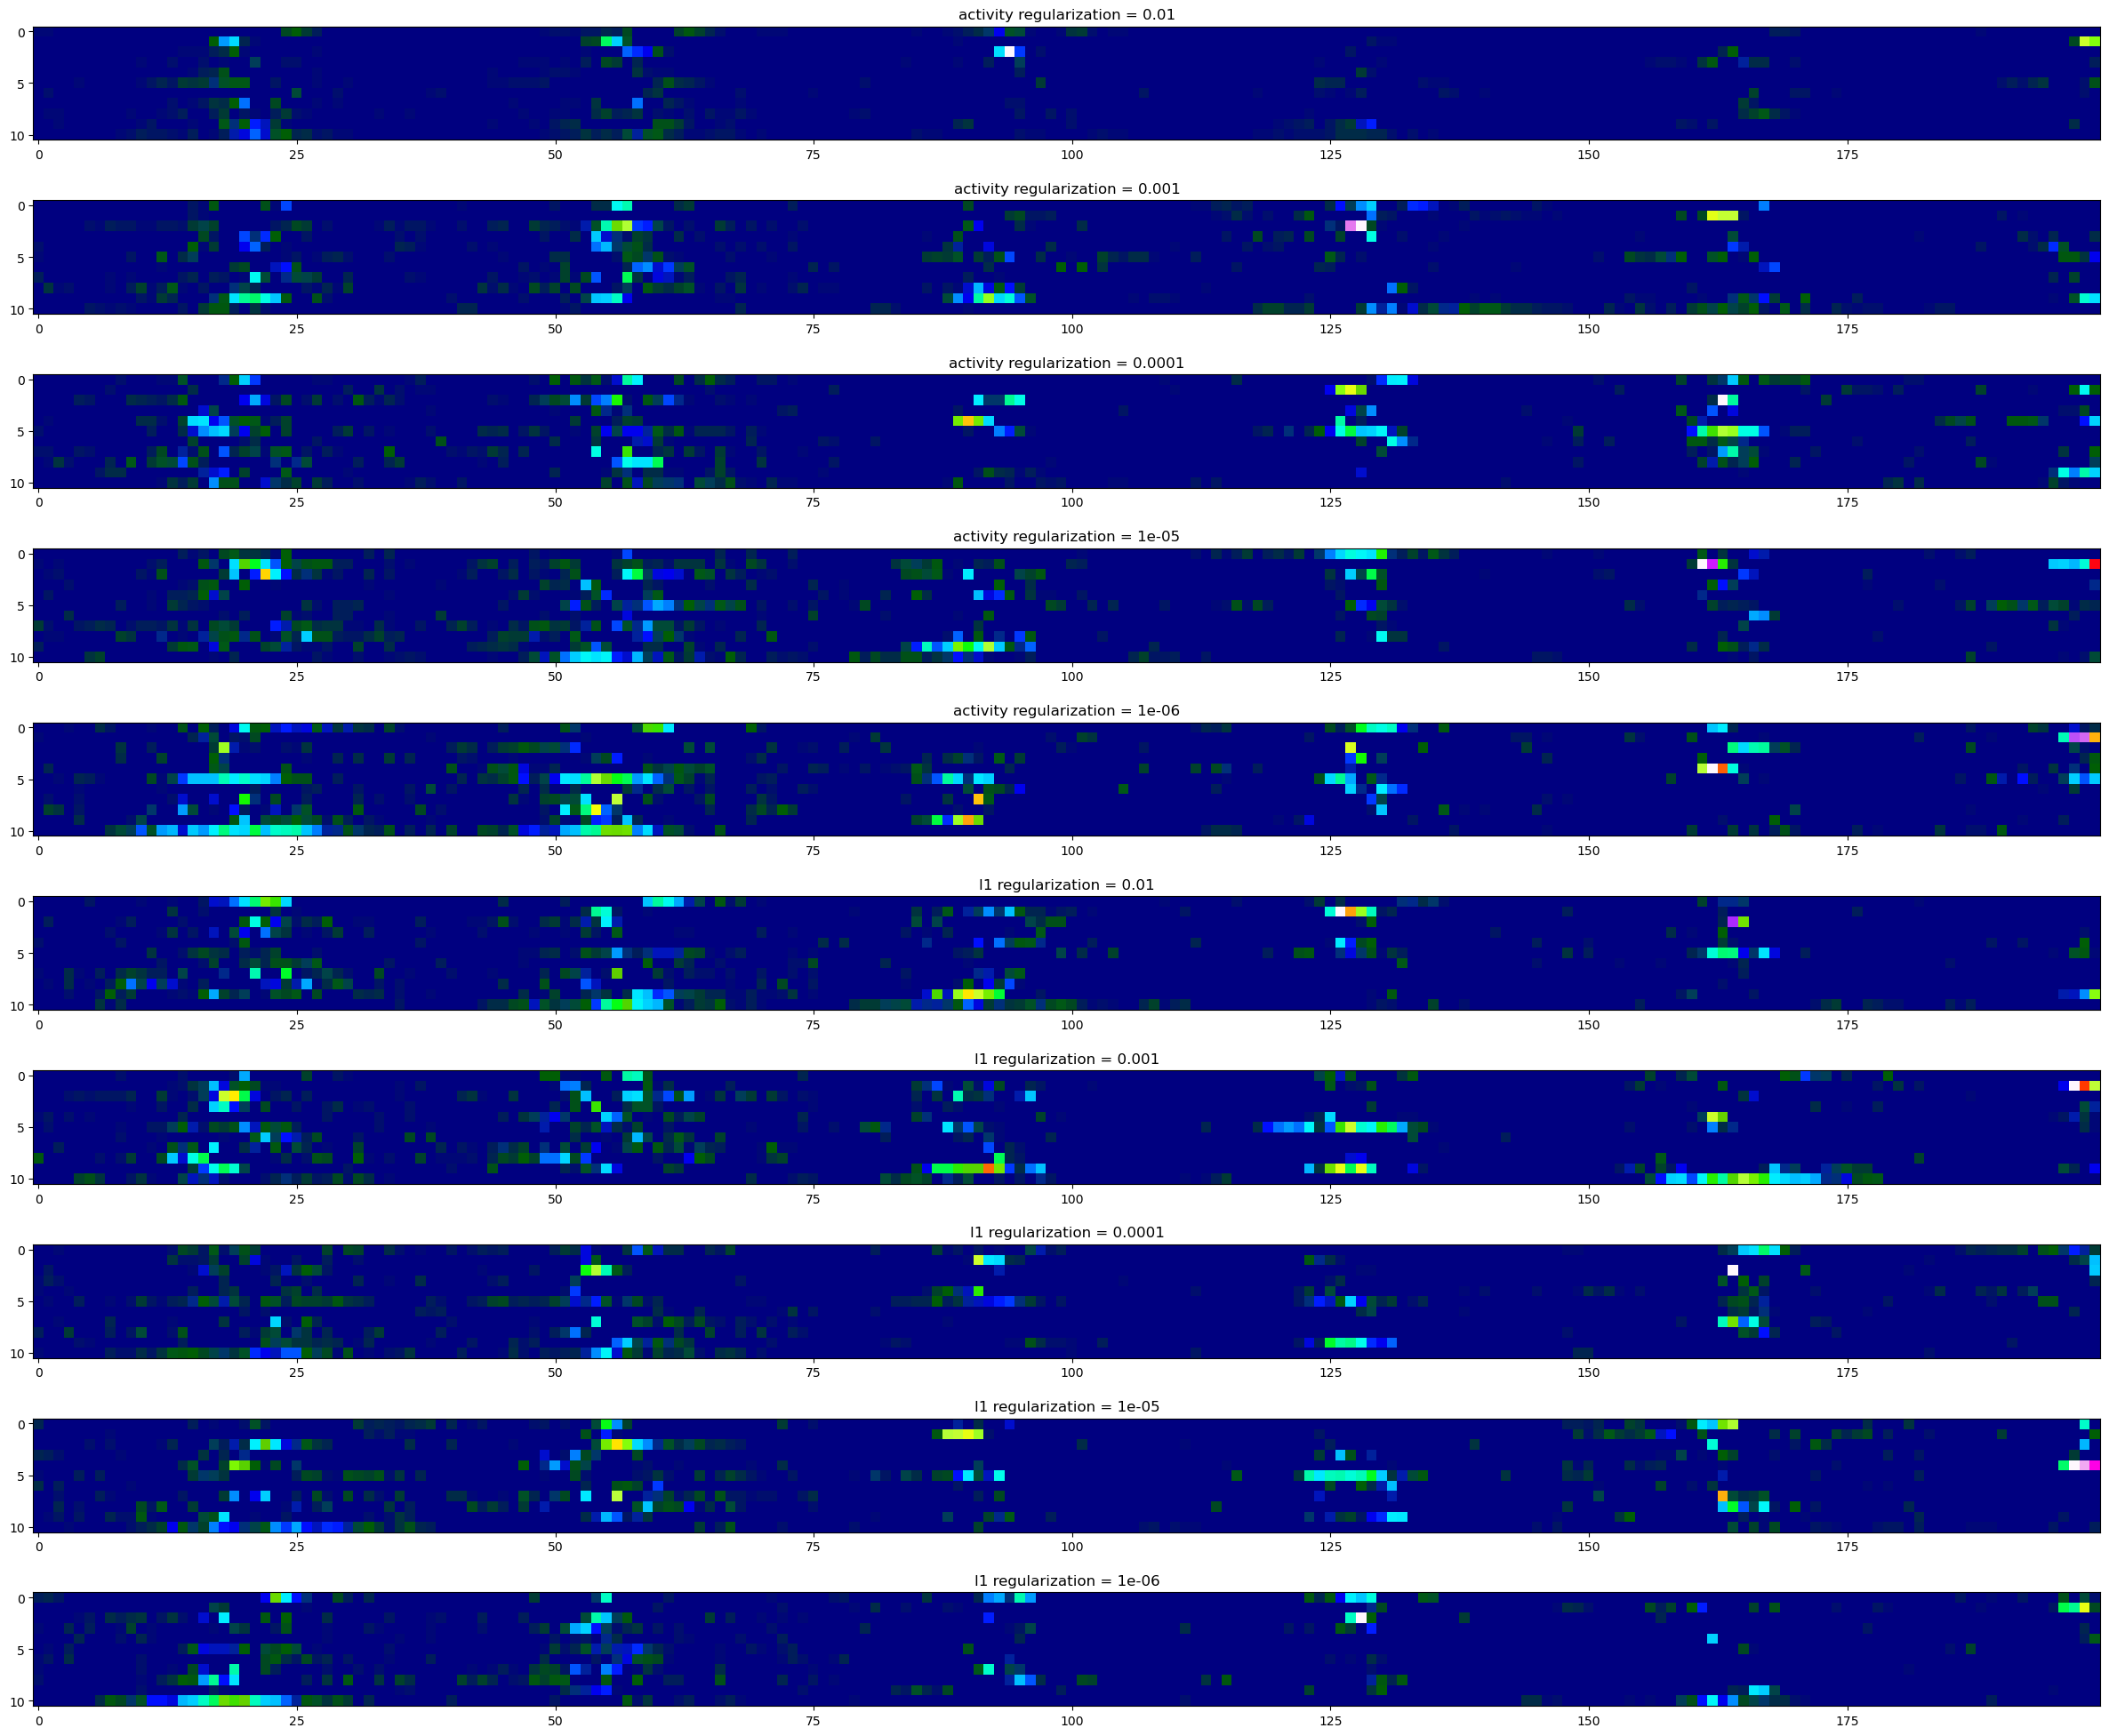

In [327]:
# (concatenate the weights from all the layers)
# plot the weights for each trial
fig = plt.figure(figsize=(30,25))
for i in range(len(e5.trials)):
    trial = e5.trials_where(name='cnim_scaffold'+str(i))[0]
    ax = fig.add_subplot(len(e5.trials),1,i+1)
    im = trial.model.networks_by_name['readout'].layers[0].weights.reshape(1152,11).T[:, 500:700]
    imin = np.min(im)
    imax = np.max(im)
    ax.imshow(im, cmap='gist_ncar', vmin=imin, vmax=imax)
    if 'activity' in trial.trial_params:
        ax.set_title('activity regularization = '+str(trial.trial_params['activity']))
    elif 'l1' in trial.trial_params:
        ax.set_title('l1 regularization = '+str(trial.trial_params['l1']))

# get the robs

In [328]:
# try some measures of sparseness to determine how well the particular
# norm is driving the weights or activities to become more sparse
# (e.g. how the L1 norm encourages some weights to become zero,
#       due to the way that that particular measure of vector length (i.e. norm) 
#       is minimized when some weights are zero)

In [329]:
# TODO:
# - are the robs correlated? or, which neurons have correlated activity?
# - are the weights correlated? or, which neurons have correlated weights?
# - are the weights correlated with the activity? or, which neurons have correlated weights and activity?

In [344]:
# calculate the correlation between the robs
trial0e5 = e5.trials_where(name='cnim_scaffold0')[0]
robs = np.array([trial0e5.dataset[i]['robs'].detach().numpy() for i in range(len(trial0e5.dataset))])

lazy loading dataset
Loading ['expt04']
Loading expt04
  Time embedding...
  Done.


In [345]:
robs.shape

(362504, 11)

In [346]:
# plot the correlation between the robs of the neurons
robs_corr = np.corrcoef(np.transpose(robs))

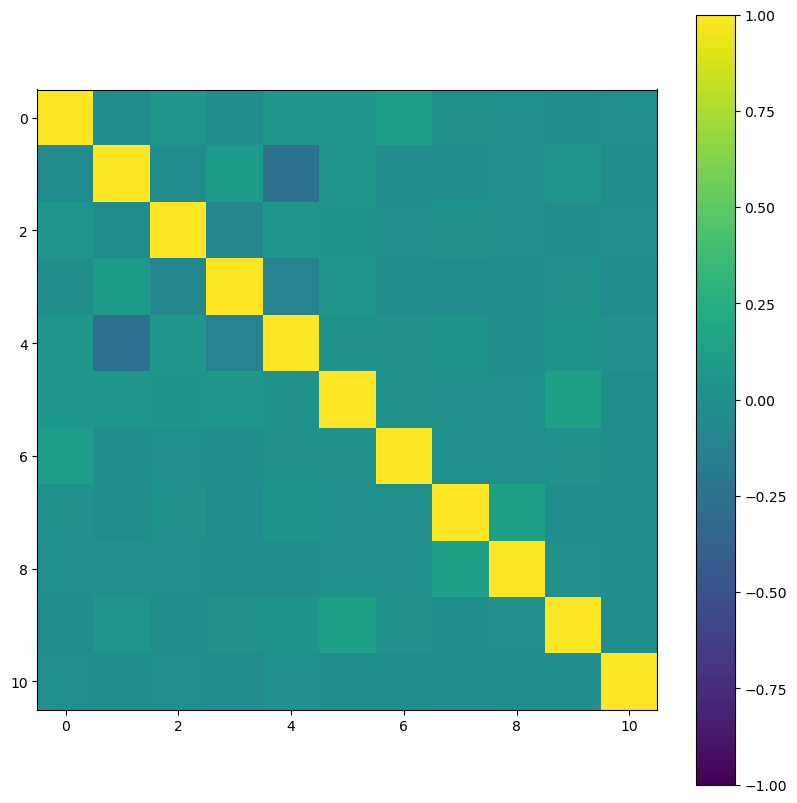

In [347]:
plt.figure(figsize=(10,10))
plt.imshow(robs_corr, cmap='viridis', vmin=-1, vmax=1)
plt.colorbar()
plt.show()

# umap

In [350]:
# use UMAP to visualize the robs
import umap
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(robs.T)
print(embedding.shape)

/home/mattjac/anaconda3/envs/pytorch/lib/python3.8/site-packages/umap/umap_.py:2344: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



(11, 2)


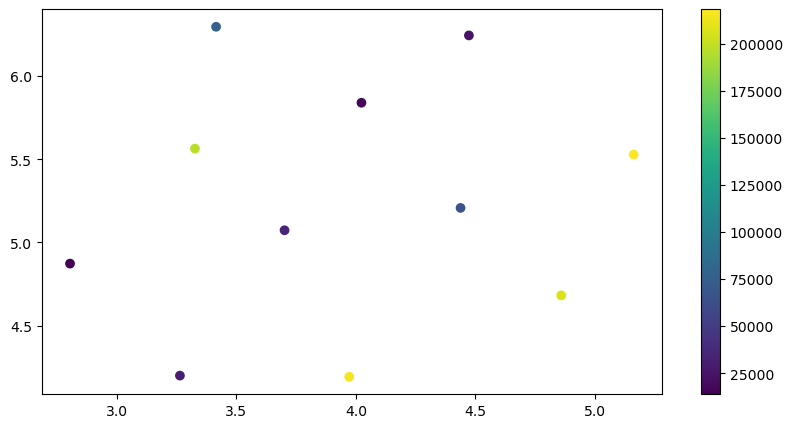

In [353]:
# plot the embedding
counts = np.sum(robs, axis=0)

# for 3D
# import plotly.express as px
# fig = px.scatter_3d(embedding, x=0, y=1, z=2, width=800, height=800, template='simple_white', color=counts)
# fig.show()

# for 2D
plt.figure(figsize=(10,5))
plt.scatter(embedding[:,0], embedding[:,1], c=counts, cmap='viridis')
plt.colorbar()
plt.show()

# try some measures of sparseness

In [362]:
# measure entropy of the robs and the weights
entropy = lambda x: -np.sum(x*np.log(x+1e-10), axis=0)

In [363]:
# calculate the entropy of the robs
robs_entropy = np.array([entropy(robs[:,i]) for i in range(robs.shape[1])])
robs_entropy

array([ -10037.056 , -125014.44  ,  -15381.143 , -110487.85  ,
       -110618.97  ,   -5968.091 ,  -92291.44  ,   -3575.341 ,
         -3186.4917,  -37310.273 ,   -1794.2382], dtype=float32)

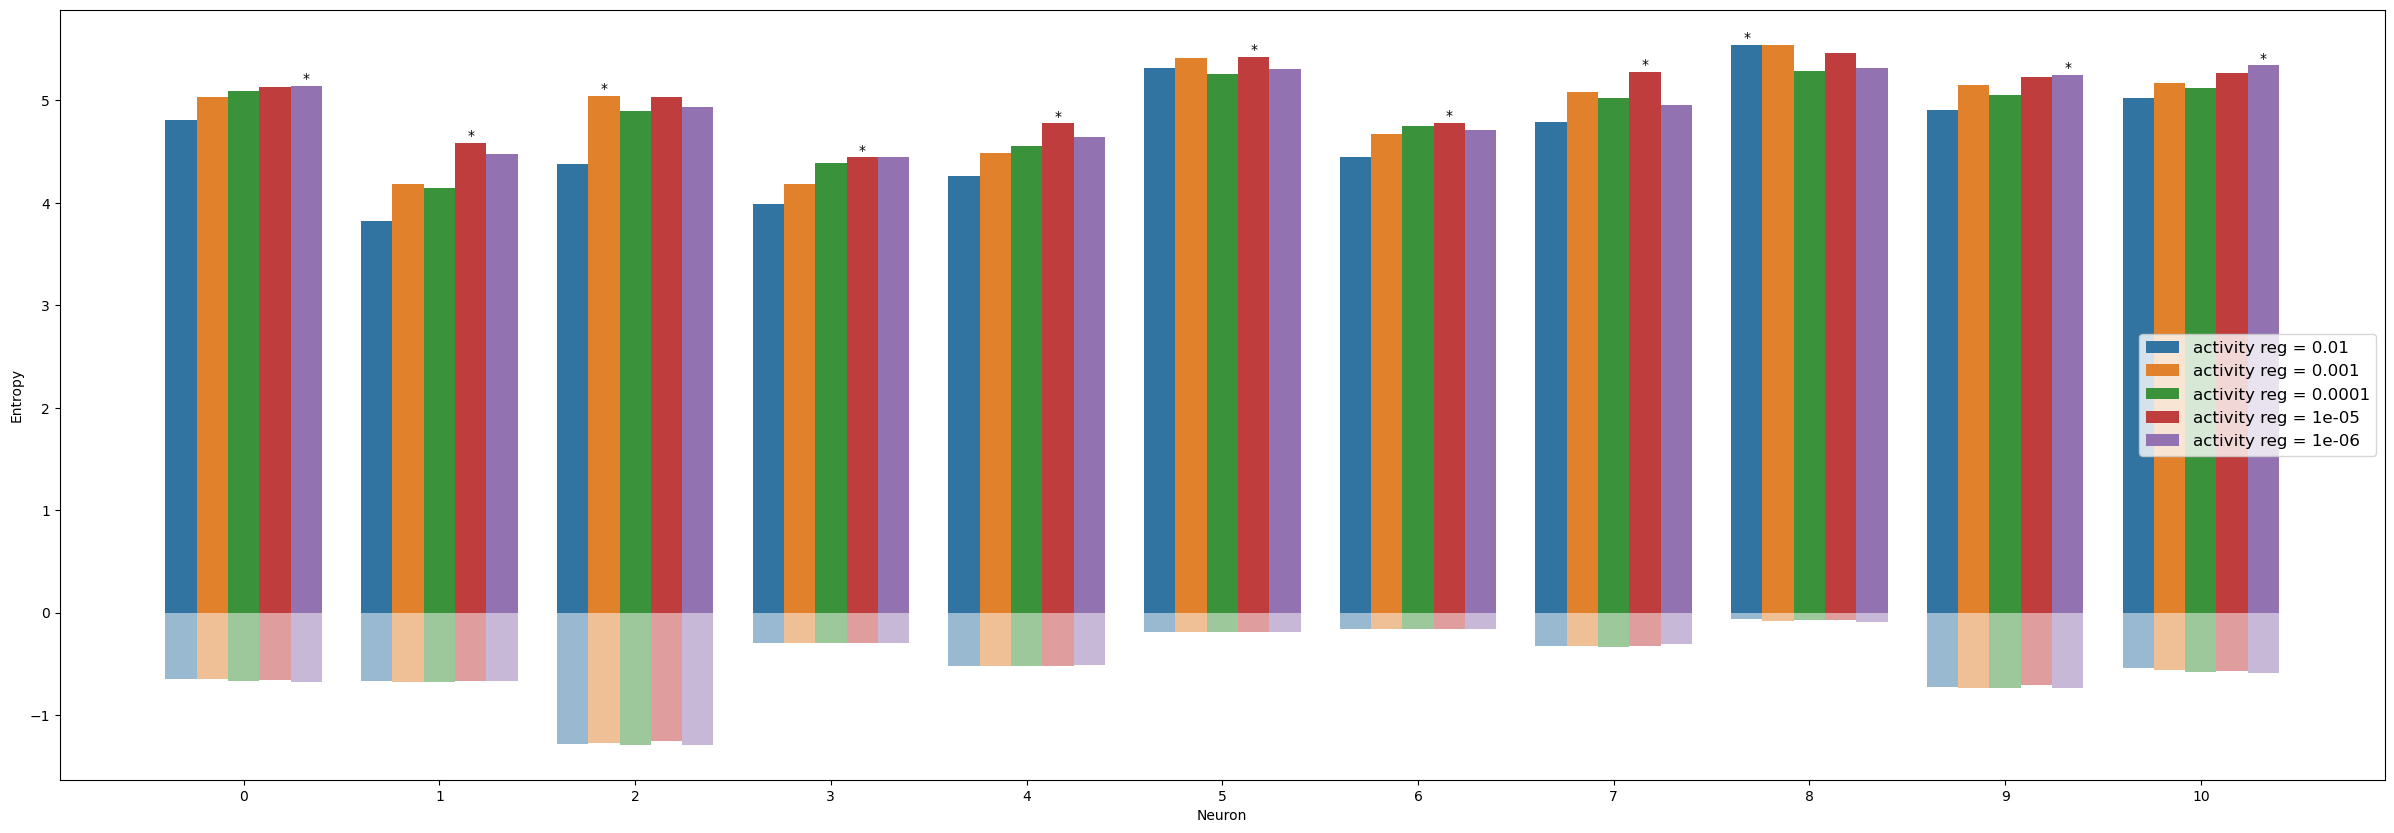

In [445]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Assuming you have e5 and its trials defined here

# subtract this value from the entropy to make it look closer to the LLs
x_offset = 0.08 #0.04
num_neurons = 11

# Prepare the data
data = []
for i in range(0, 5): # len(e5.trials)):
    trial = e5.trials_where(name='cnim_scaffold' + str(i))[0]
    weights = trial.model.networks_by_name['readout'].layers[0].weights.reshape(1152, 11)
    weights_entropy = np.array([entropy(weights[:, i]) for i in range(weights.shape[1])])

    if 'activity' in trial.trial_params:
        label = 'activity reg = ' + str(trial.trial_params['activity'])
    elif 'l1' in trial.trial_params:
        label = 'l1 reg = ' + str(trial.trial_params['l1'])

    for neuron_idx, neuron_entropy in enumerate(weights_entropy):
        neuron_LL = trial.LLs[neuron_idx]
        data.append({'Neuron': neuron_idx, 'Entropy': neuron_entropy, 'LL': neuron_LL, 'Trial': label})

# Create a DataFrame
df = pd.DataFrame(data)

# Get the unique trial labels
trial_labels = df['Trial'].unique()

# Create the bar plot
fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(x='Neuron', y='Entropy', hue='Trial', data=df, ax=ax)

# Add the LL values as downward pointing bars below the entropy bars
LL_factor = -1  # Adjust this factor to change the scale of the LL bars
for i, bar in enumerate(ax.containers):
    bar_width = None
    if i >= len(trial_labels):
        break
    for j, b in enumerate(bar):
        if bar_width is None:
            bar_width = b.get_width()
        idx = i*num_neurons + j
        height = df.iloc[idx]['LL'] * LL_factor
        ax.bar(b.get_x()+x_offset, height, width=bar_width, bottom=0, color=b.get_facecolor(), alpha=0.5)

# Set y-axis limits
ax.set_ylim(top=ax.get_ylim()[1])

# Add asterisks to the highest bars for each neuron
max_indices = df.groupby(['Neuron'])['Entropy'].idxmax().values
for i, bar in enumerate(ax.containers):
    if i >= len(trial_labels):
        break
    for j, b in enumerate(bar):
        if df.loc[max_indices[j], 'Trial'] == trial_labels[i]:
            height = b.get_height()
            ax.text(b.get_x() + b.get_width() / 2, height, '*', ha='center', va='bottom')

plt.legend(fontsize=12, loc='center right')
plt.show()

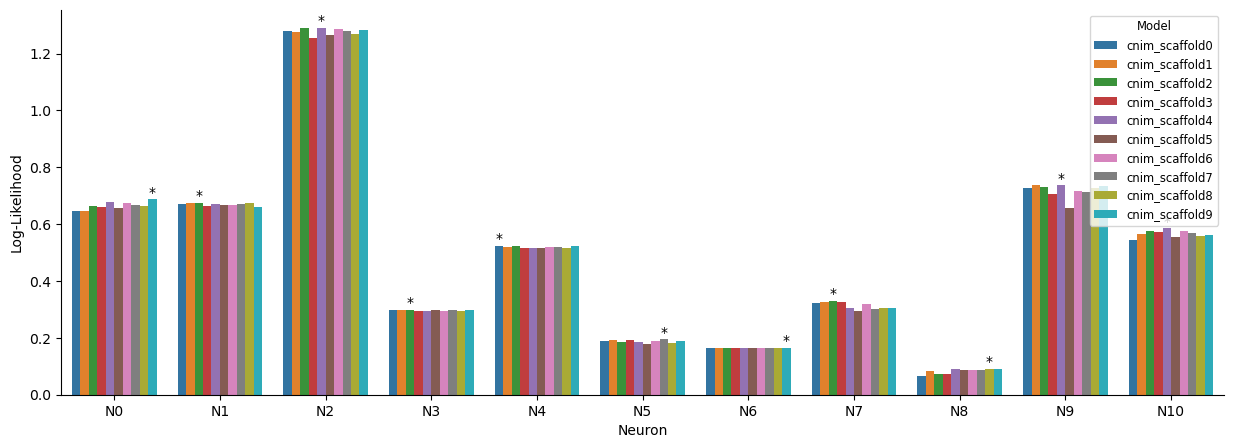

In [412]:
e5.plot_LLs()

In [419]:
trial0 = e5.trials_where(name='cnim_scaffold' + str(0))[0]

df.loc[0*len(trial_labels) + 1, 'LL']
df

,Neuron,Entropy,LL,Trial
0,0,1.311940,0.644850,activity reg = 0.01
1,1,0.323752,0.669920,activity reg = 0.01
2,2,0.879940,1.279463,activity reg = 0.01
3,3,0.487872,0.297297,activity reg = 0.01
4,4,0.760182,0.523876,activity reg = 0.01
...,...,...,...,...
105,6,1.055019,0.165064,l1 reg = 1e-06
106,7,1.420978,0.305486,l1 reg = 1e-06
107,8,1.719864,0.089684,l1 reg = 1e-06
108,9,1.656765,0.734733,l1 reg = 1e-06
